In [1]:
#Import packages
#---------------------------------------
import sys
import os
import glob
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pygtftk as gtftk
import pyranges as pr

#Import your modules
#---------------------------------------
import te_rna_f as te
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Define paths
#----------------------------------------------------------------------
l_code = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
l_data = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
l_fig = '/Users/dominicburrows/Dropbox/PhD/figures/'

s_code = '/cndd3/dburrows/CODE/'
s_data = '/cndd3/dburrows/DATA/'
s_fig = '/cndd3/dburrows/FIGS/'

%load_ext autoreload
sys.version

'3.9.12 (main, Apr  5 2022, 06:56:58) \n[GCC 7.5.0]'

# Load metadata




In [179]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
meta = pd.read_csv('/datasets/Public_Datasets/Dracheva_PsychEncode_development/processed/PEC_RNAmeta.csv')


In [180]:
male_GABA = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GABA')]
male_GLU = meta[np.array(meta['sex'] == 'Male') & np.array(meta['Cell Type'] == 'GLU')]


In [181]:
zipped_pairs = zip(male_GLU['AGEYEARS'], male_GLU['Sample ID'])
z = [x for x in sorted(zipped_pairs)]
ind = z[::3][2:]
names = np.asarray(ind)[:,1]
ind, names

([(4, '6032'),
  (11, '6285'),
  (15, '1823'),
  (17, '5643'),
  (30, 'Hct16HECA028'),
  (35, '1277'),
  (39, '1241'),
  (58, '1848'),
  (62, '5326'),
  (77, '5744')],
 array(['6032', '6285', '1823', '5643', 'Hct16HECA028', '1277', '1241',
        '1848', '5326', '5744'], dtype='<U21'))

In [182]:
#GLU DATA
male_GLU_df = male_GLU.iloc[[np.where(names[i] == male_GLU['Sample ID'])[0][0] for i in range(len(names))]]
male_GLU_df

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
89,6032,GLU,6.5,7,1/27/2022,10,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Head & Neck injuries,4,51.0,Male,White,6.34,25.0,6032-GLU,earlychildhood
91,6285,GLU,3.4,5.5,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,NaN,Traumatic arrest/blunt trauma (ped. vs vehicle),11,25.0,Male,White,7.02,8.0,6285-GLU,latechildhood
16,1823,GLU,6.1,7,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,15,128.0,Male,White,5.55,18.0,1823-GLU,adolescence
71,5643,GLU,5.5,7.8,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cardiac Arrhythmia due to conduction system,17,123.0,Male,Black or African-American,ND,14.0,5643-GLU,adolescence
109,Hct16HECA028,GLU,4.2,8.2,2/16/2022,14,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Hypertensive and Atherosclerotic Cardiovascula...,30,279.0,Male,Black or African-American,6.58,20.8,Hct16HECA028-GLU,adulthood
9,1277,GLU,5.9,8.9,3/10/2022,17,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),35,27.0,Male,White,5.47,20.0,1277-GLU,adulthood
93,1241,GLU,4.4,7.9,1/27/2022,10,MSSM Brain Bank,Unaffected Control,manner of death: natural,39,NaN,Male,White,7,20.6,1241-GLU,adulthood
18,1848,GLU,5.2,7.8,11/29/2021,6,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,HASCVD,58,49.0,Male,Black or African-American,6.02,9.0,1848-GLU,lateadulthood
55,5326,GLU,5.1,7.3,2/9/2022,13,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Torso Injuries,62,107.0,Male,White,6.02,6.0,5326-GLU,lateadulthood
73,5744,GLU,3.4,9.5,3/25/2022,20,Human Brain and Spinal Fluid Resource Center (...,Unaffected Control,Undetermined,77,NaN,Male,White,6.6,22.0,5744-GLU,lateadulthood


In [99]:
#GABA DATA
male_GABA_df = male_GABA.iloc[[np.where(names[i] == male_GABA['Sample ID'])[0][0] for i in range(len(names))]]
male_GABA_df

,Sample ID,Cell Type,RIN,Bulk tissue RNA RIN#,RNAseq Library Prep Date Date,batch,Brain Bank,DISORDER,CDEATHOFF,AGEYEARS,AGEDAYS,sex,race,Brain PH,PMI Hours,sample,period
88,6032,GABA,6.6,7,1/27/2022,10,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Head & Neck injuries,4,51.0,Male,White,6.34,25.0,6032-GABA,earlychildhood
90,6285,GABA,4.4,5.5,2/16/2022,14,University of Maryland Brain and Tissue Bank(U...,NaN,Traumatic arrest/blunt trauma (ped. vs vehicle),11,25.0,Male,White,7.02,8.0,6285-GABA,latechildhood
15,1823,GABA,5.8,7,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Multiple Injuries,15,128.0,Male,White,5.55,18.0,1823-GABA,adolescence
70,5643,GABA,5.4,7.8,3/17/2022,18,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Cardiac Arrhythmia due to conduction system,17,123.0,Male,Black or African-American,ND,14.0,5643-GABA,adolescence
108,Hct16HECA028,GABA,4.2,8.2,2/16/2022,14,University of Miami's Brain Endowment Bank,UNAFFECTED CONTROL,Hypertensive and Atherosclerotic Cardiovascula...,30,279.0,Male,Black or African-American,6.58,20.8,Hct16HECA028-GABA,adulthood
8,1277,GABA,5.6,8.9,3/10/2022,17,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,ASCVD (Arteriosclerotic Cardiovascular Disease),35,27.0,Male,White,5.47,20.0,1277-GABA,adulthood
92,1241,GABA,4.8,7.9,1/27/2022,10,MSSM Brain Bank,Unaffected Control,manner of death: natural,39,NaN,Male,White,7,20.6,1241-GABA,adulthood
17,1848,GABA,5.2,7.8,11/29/2021,6,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,HASCVD,58,49.0,Male,Black or African-American,6.02,9.0,1848-GABA,lateadulthood
54,5326,GABA,4.3,7.3,2/9/2022,13,University of Maryland Brain and Tissue Bank(U...,Unaffected Control,Torso Injuries,62,107.0,Male,White,6.02,6.0,5326-GABA,lateadulthood
72,5744,GABA,3.4,9.5,3/25/2022,20,Human Brain and Spinal Fluid Resource Center (...,Unaffected Control,Undetermined,77,NaN,Male,White,6.6,22.0,5744-GABA,lateadulthood


# Filter for TSO



### Calculate TSS dispersion after TSO filtering


In [3]:
tss = pr.read_bed('/cndd3/dburrows/DATA/te/gtf/annotations/refTSS/refTSS_v3.3_human_coordinate.hg38.bed')

In [4]:
tss

,Chromosome,Start,End,Name,Score,Strand,ThickStart,ThickEnd,ItemRGB
0,chr1,36521,36538,hg_234905.1,1,+,36529,36530,"255,255,0"
1,chr1,207042,207057,hg_233845.1,1,+,207049,207050,"255,255,0"
2,chr1,629191,629220,hg_1.1,1,+,629205,629206,"255,255,0"
3,chr1,629259,629269,hg_2.1,1,+,629264,629265,"255,255,0"
4,chr1,629635,629651,hg_235997.1,1,+,629643,629644,"255,255,0"
...,...,...,...,...,...,...,...,...,...
224689,chrY,24776485,24776499,hg_244143.1,1,-,24776492,24776493,"255,255,0"
224690,chrY,24813392,24813393,hg_244144.1,1,-,24813392,24813393,"255,255,0"
224691,chrY,25051999,25052000,hg_244147.1,1,-,25051999,25052000,"255,255,0"
224692,chrY,26671129,26671136,hg_201298.1,1,-,26671132,26671133,"255,255,0"


In [124]:
import glob
glob.glob('/cndd3/dburrows/DATA/te/rna/aligned.subset.TSO-filt/5326-GLU' + '/*Tra*.bam')[0]

'/cndd3/dburrows/DATA/te/rna/aligned.subset.TSO-filt/5326-GLU/Aligned.toTranscriptome.out.bam'

In [114]:
glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*trim.*.gz')

['/cndd3/dburrows/DATA/te/rna/fastq.subset/1823-GABA-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1241-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5744-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1848-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6285-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1277-GABA-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1848-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6285-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/6032-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5643-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/1823-GLU-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5326-GABA-R2-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5326-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subset/5744-GLU-R1-trim.fq.gz',
 '/cndd3/dburrows/DATA/te/rna/fastq.subse

### Calculate positions of TSO

In [36]:
import glob
R1_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R2_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R1_l, R2_l

(['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'],
 ['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'])

In [37]:
def read_cat(path):
    with open(path) as f:
        prac = f.read().splitlines()
    v = np.asarray(str.split(prac[0])).astype(int)
    return(v)


In [38]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


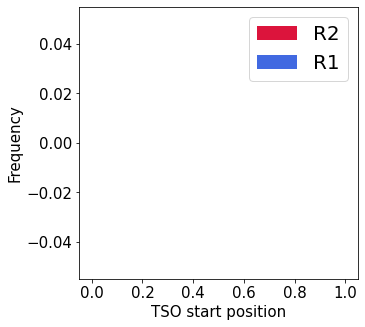

In [103]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_cat, bins = 50, color='crimson', label='R2')
plt.hist(R1_cat, bins = 50, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

In [49]:
import glob
R1_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R1*txt')
R2_l = glob.glob('/cndd3/dburrows/DATA/te/rna/fastq.subset/*prac*R2*txt')
R1_l, R2_l

(['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R1-trim-pos.txt'],
 ['/cndd3/dburrows/DATA/te/rna/fastq.subset/prac.5326-GABA-R2-trim-pos.txt'])

In [40]:
def read_cat(path):
    with open(path) as f:
        prac = f.read().splitlines()
    v = np.asarray(prac).astype(int)
    return(v)


In [50]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


In [55]:
R1_cat, R2_cat

(array([100.,  11.,  38., ..., 100.,   0.,  47.]),
 array([ 75., 100., 100., ...,  78., 100., 100.]))

In [48]:
np.max(R1_cat)

100.0

In [60]:
R1_filt = 100 - R1_cat[R1_cat < R2_cat]
R2_filt = 100 - R2_cat[R2_cat < R1_cat]


In [56]:
R1_filt = 100 - R1_cat
R2_filt = 100 - R2_cat


In [59]:
R1_filt

array([  0.,  89.,  62., ...,   0., 100.,  53.])

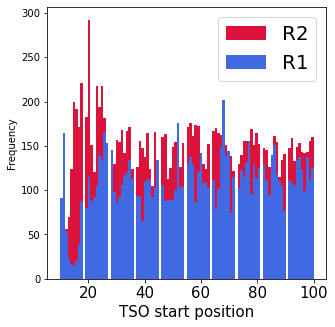

In [61]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_filt, bins = 100, color='crimson', label='R2')
plt.hist(R1_filt, bins = 100, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 20})
#plt.savefig(s_fig + '/TSO_pos_cutadapt.svg', transparent=True)
plt.show()

In [ ]:
R1_filt = 100 - R1_cat[R1_cat < 100]
R2_filt = 100 - R2_cat[R2_cat < 100]

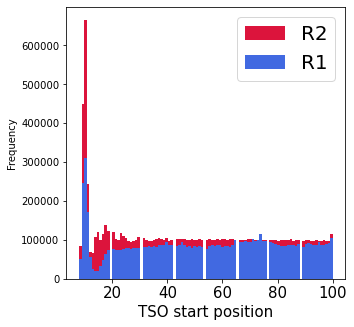

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(R2_filt, bins = 100, color='crimson', label='R2')
plt.hist(R1_filt, bins = 100, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 20})
plt.savefig(s_fig + '/TSO_pos_cutadapt.svg', transparent=True)
plt.show()

In [ ]:
R1_cat, R2_cat = [],[]
for i in range(len(R2_l)):
    R1_cat = np.hstack((R1_cat, read_cat(R1_l[i])))
    R2_cat = np.hstack((R2_cat, read_cat(R2_l[i])))


### Calculate proportions of TSO

In [ ]:
# For non-TSO analysis, Male, 10 timepoints (Glu + Gaba)
df = pd.read_csv('/cndd3/dburrows/DATA/te/rna/fastq.subset.TSO/TSO_counts.csv')


In [ ]:
df

,ID,counts,total reads,normalised counts
0,6032-GLU,5393484,461783892,0
1,6032-GABA,4086032,342269132,0
2,6285-GLU,6126792,502425144,0
3,6285-GABA,7227780,613945456,0
4,1823-GLU,0,302078012,0
5,1823-GABA,4499944,406219576,0
6,5643-GLU,3905756,344266196,0
7,5643-GABA,5161144,445277700,0
8,HCK16HECA028-GLU,4857624,397996640,0
9,HCK16HECA028-GABA,4850800,407171776,0


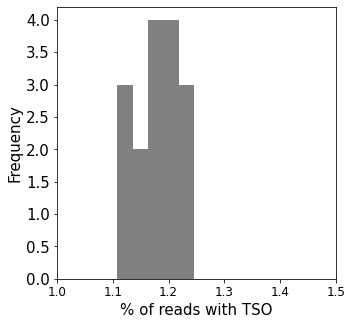

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
data = np.asarray(df['counts']/df[' total reads']) 
data[data>0]
plt.hist(data[data>0]*100, bins=5, color='grey')
plt.xlabel('% of reads with TSO', fontsize=15)
plt.xlim(1,1.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.savefig(s_fig + '/TSO_freq.svg', transparent=True)
plt.show()



In [ ]:
fig,ax = plt.subplots(figsize=(7,5))
plt.hist(R2_cat, bins = 50, color='crimson', label='R2')
plt.hist(R1_cat, bins = 50, color='royalblue', label='R1')
plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.legend(prop={'size': 20})
plt.show()

# Filter by 5' alignment

### Generate full-length TE bed file

In [36]:
# Load in data

#rmsk file
rmsk = pr.read_gtf('/cndd3/dburrows/DATA/te/gtf/annotations/rmsk/rmsk.hg38.gtf', as_df=True)

In [39]:
rmsk

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
0,chr1,hg38_rmsk,exon,100000000,100000637,11325,-,.,L1M2,L1M2_dup229,L1,LINE
1,chr1,hg38_rmsk,exon,10000001,10000239,1760,+,.,AluSx3,AluSx3_dup157,Alu,SINE
2,chr1,hg38_rmsk,exon,100000743,100002612,11325,-,.,L1M2,L1M2_dup230,L1,LINE
3,chr1,hg38_rmsk,exon,10000250,10000566,2225,+,.,AluSx,AluSx_dup700,Alu,SINE
4,chr1,hg38_rmsk,exon,100002612,100002913,1799,-,.,AluJr,AluJr_dup3513,Alu,SINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4693506,chrY,hg38_rmsk,exon,9998087,9998438,1154,-,.,MLT1B,MLT1B_dup11187,ERVL-MaLR,LTR
4693507,chrY,hg38_rmsk,exon,9999718,9999778,228,-,.,MIR3,MIR3_dup51650,MIR,SINE
4693508,KI270740.1,hg38_rmsk,exon,228,540,2240,-,.,AluY,AluY_dup110742,Alu,SINE
4693509,KI270740.1,hg38_rmsk,exon,624,867,1433,-,.,L1PA7,L1PA7_dup13354,L1,LINE


In [154]:
#FILTER FOR LINEs
line = rmsk[rmsk['class_id'] == 'LINE']
print('Line families = ' + str(line['family_id'].unique()))
print('Here we only look at L1 and L2 families')
l1 = line[line['family_id']=='L1']
l2 = line[line['family_id']=='L2']
print('Total L1 insertions in reference n = ' + str(len(l1)))
print('Total L2 insertions in reference n = ' + str(len(l2)))

#Remove truncated insertions by length
l1_co = 5500  #define minimum length for l1 insertions
l2_co = 2500 #define minimum length for l2 insertions

l1_full = l1[l1['End']-l1['Start'] > l1_co]
l2_full = l2[l2['End']-l2['Start'] > l2_co]

assert np.max(l1_full['End']-l1_full['Start']) > l1_co,  'L1 elements not corectly filtered'
assert np.max(l2_full['End']-l2_full['Start']) > l2_co,  'L2 elements not corectly filtered'
print ('Retained L1 insertions = ' + str(len(l1_full)) + ' ,  Truncated L1 insertions removed = ' + str(len(l1)-len(l1_full)))
print ('Retained L2 insertions = ' + str(len(l2_full)) + ' ,  Truncated L2 insertions removed = ' + str(len(l2)-len(l2_full))) 

Line families = ['L1' 'L2' 'CR1' 'RTE-Bo.B' 'RTE-X' 'Penelope' 'Dong-R4' 'RTE-BovB']
Here we only look at L1 and L2 families
Total L1 insertions in reference n = 1001410
Total L2 insertions in reference n = 474561
Retained L1 insertions = 8991 ,  Truncated L1 insertions removed = 992419
Retained L2 insertions = 46 ,  Truncated L2 insertions removed = 474515


In [161]:
#FILTER FOR SINEs
sine = rmsk[rmsk['class_id'] == 'SINE']
print('Sine families = ' + str(sine['family_id'].unique()))
print('Here we only look at Alu and MIR families')
alu = sine[sine['family_id']=='Alu']
mir = sine[sine['family_id']=='MIR']
print('Total Alu insertions in reference n = ' + str(len(alu)))
print('Total MIR insertions in reference n = ' + str(len(mir)))

#Remove truncated insertions by length
alu_co = 250  #define minimum length for alu insertions
mir_co = 230 #define minimum length for mir insertions

alu_full = alu[alu['End']-alu['Start'] > alu_co]
mir_full = mir[mir['End']-mir['Start'] > mir_co]

assert np.max(alu_full['End']-alu_full['Start']) > alu_co,  'Alu elements not corectly filtered'
assert np.max(mir_full['End']-mir_full['Start']) > mir_co,  'Mir elements not corectly filtered'
print ('Retained Alu insertions = ' + str(len(alu_full)) + ' ,  Truncated Alu insertions removed = ' + str(len(alu)-len(alu_full)))
print ('Retained Mir insertions = ' + str(len(mir_full)) + ' ,  Truncated Mir insertions removed = ' + str(len(mir)-len(mir_full)))

Sine families = ['Alu' 'MIR' '5S-Deu-L2']
Here we only look at Alu and MIR families
Total Alu insertions in reference n = 1238897
Total MIR insertions in reference n = 602609
Retained Alu insertions = 929241 ,  Truncated Alu insertions removed = 309656
Retained Mir insertions = 46788 ,  Truncated Mir insertions removed = 555821


In [218]:
# Convert into BED file
te_df = pd.concat([l1_full, l2_full, alu_full, mir_full]) #concatenate all TEs
assert len(te_bed) == len(l1_full) + len(l2_full) + len(alu_full) + len(mir_full), 'TEs not properly concatenated'

# Only include 5' end of TE insertions for alignment 
n_start = 20 #Define the number of bps from the start of insertion to keep
te_bed = te_df.drop(['Source', 'Feature', 'Score', 'Frame'], axis=1) #re-order and remove some columns
te_bed = te_bed[['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']]
te_bed['End'] = te_bed['Start'] + n_start 

# #split up the +/- strands in bed file
bed_plus = te_bed[te_bed["Strand"] == '+']
bed_minus = te_bed[te_bed["Strand"] == '-']
assert len(bed_plus) + len(bed_minus) == len(te_bed), 'Some insertions not assigned to +/- strands'
assert sum(bed_plus["Strand"] == "+") == len(bed_plus), 'Some non plus strands assigned to plus bed'
assert sum(bed_minus["Strand"] == "-") == len(bed_minus), 'Some non minus strands assigned to minus bed'

# Write to bed file
bed_plus.to_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.bed', sep='\t', index=False, header=False)
bed_minus.to_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.bed', sep='\t', index=False, header=False)

#sort by chromosome and start position

### Filter BAM file to retain 5'ss aligned reads

In [ ]:
#BEWARY OF NAMING - PLUS AND MINUS!
#Split bam into forward and reverse strands - total time = 40 minutes (20m per strand)
#forward strand + 
samtools view -h -F 0x10 Aligned.sortedByCoord.out.bam > plus.bam

#reverse strand - 
samtools view -h -f 0x10 Aligned.sortedByCoord.out.bam > minus.bam

In [ ]:
#BEWARY OF NAMING - PLUS AND MINUS!
# Filter bam with bed file - total time = 20 minutes (10 minutes per strand)
#plus
samtools view -b -h -L /cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.plus.bed plus.bam > plus.5pfilt.bam
samtools index plus.5pfilt.bam

#minus
samtools view -b -h -L /cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.minus.bed minus.bam > minus.5pfilt.bam
samtools index minus.5pfilt.bam


In [ ]:
# Obtain UMI,flag, chromosome number and start positions
samtools view plus.5pfilt.bam  | cut -f 1,2,3,4 > plus.5pfilt.UMI.txt
samtools view minus.5pfilt.bam  | cut -f 1,2,3,4 > minus.5pfilt.UMI.txt


In [45]:
#BEWARY OF NAMING - PLUS AND MINUS!
#Read in required files for filtering
bed_pl = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.sort.plus.bed', sep='\t', header=None)
bed_pl.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']
bed_mi = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.sort.minus.bed',sep='\t', header=None)
bed_mi.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']

bam_pl = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt.bam', as_df=True) #CHANGE
bam_mi = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt.bam', as_df=True) #CHANGE


#File checks
assert sum(bam_pl['Strand'] == '+') == len(bam_pl), 'Some non plus strands assigned to plus bam'
assert sum(bam_mi['Strand'] == '-') == len(bam_mi), 'Some non minus strands assigned to minus bam'
assert sum(bed_pl['Strand'] == '+') == len(bed_pl), 'Some non plus strands assigned to plus bed'
assert sum(bed_mi['Strand'] == '-') == len(bed_mi), 'Some non minus strands assigned to minus bed'


In [47]:
#Define + and - strand files
pl_pars = [bed_pl, bam_pl, '/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt.UMI.txt', 'plus'] #CHANGE
mi_pars = [bed_mi, bam_mi, '/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt.UMI.txt', 'minus'] #CHANGE
par_list = [pl_pars, mi_pars]


In [49]:
curr_name = pd.read_csv(pl_pars[2], sep='\t', header=None)

In [51]:
curr_name[0]

0          A00132:417:HKVTWDSX3:3:2363:18945:31986
1          A00132:417:HKVTWDSX3:3:2363:18936:32002
2          A00132:417:HKVTWDSX3:3:2363:18575:32941
3          A00132:417:HKVTWDSX3:3:2363:18385:33019
4           A00132:417:HKVTWDSX3:3:1273:2709:24408
                            ...                   
3677386    A00132:417:HKVTWDSX3:3:1545:10212:16955
3677387     A00132:417:HKVTWDSX3:3:1274:7853:12649
3677388     A00132:417:HKVTWDSX3:3:1277:21016:1689
3677389     A00132:417:HKVTWDSX3:3:1277:20419:1783
3677390     A00132:417:HKVTWDSX3:3:1424:3531:11804
Name: 0, Length: 3677391, dtype: object

In [52]:
pd.options.mode.chained_assignment = None  # default='warn'
%autoreload
count_df = pd.DataFrame() #empty count matrix

# Filter out reads that do not overlap with 5' portion of insertion
for par in par_list:
    curr_bed = par[0]
    curr_bam = par[1]
    curr_name = pd.read_csv(par[2], sep='\t', header=None)
    assert len(curr_bam) == len(curr_name), 'Bam and UMI files not the same length'
    curr_bam['UMI']=curr_name[0].values #CHANGE CHANGE CHANGE 
    bam_ll = [[],[]] #empty list of lists to store curr_bam indices
    if par[3] == 'plus': bam_ind = bam_ll[0] 
    elif par[3] == 'minus': bam_ind = bam_ll[1]

    #Loop through each chromosome
    chr_unq = np.unique(curr_bam['Chromosome'].values)
    for i,chr in enumerate(chr_unq):
        print('Aligning to chromosome ' + chr + ' for ' + par[3] + ' strand')
        
        #Slice bed/bam files by chromosome
        chr_bam = curr_bam[curr_bam['Chromosome'] == chr]
        chr_bed = curr_bed[curr_bed['Chromosome'] == chr]
        count_df, bam_ind = te.five_prime_align(chr_bam, chr_bed, count_df, bam_ind)



Aligning to chromosome chr1 for plus strand
Aligning to chromosome chr10 for plus strand
Aligning to chromosome chr11 for plus strand
Aligning to chromosome chr12 for plus strand
Aligning to chromosome chr13 for plus strand
Aligning to chromosome chr14 for plus strand
Aligning to chromosome chr15 for plus strand
Aligning to chromosome chr16 for plus strand
Aligning to chromosome chr17 for plus strand
Aligning to chromosome chr18 for plus strand
Aligning to chromosome chr19 for plus strand
Aligning to chromosome chr2 for plus strand
Aligning to chromosome chr20 for plus strand
Aligning to chromosome chr21 for plus strand
Aligning to chromosome chr22 for plus strand
Aligning to chromosome chr3 for plus strand
Aligning to chromosome chr4 for plus strand
Aligning to chromosome chr5 for plus strand
Aligning to chromosome chr6 for plus strand
Aligning to chromosome chr7 for plus strand
Aligning to chromosome chr8 for plus strand
Aligning to chromosome chr9 for plus strand
Aligning to chromos

In [53]:
count_df[count_df['Strand'] == '+']

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count
61534,chr1,240195735,240195755,+,AluJo_dup6673,AluJo,Alu,SINE,1.0
22163,chr1,1357526,1357546,+,AluSx1_dup79,AluSx1,Alu,SINE,1.0
62249,chr1,243435188,243435208,+,MIR_dup15980,MIR,MIR,SINE,1.0
51016,chr1,172601207,172601227,+,AluSz_dup6301,AluSz,Alu,SINE,1.0
34831,chr1,46158806,46158826,+,AluSx3_dup949,AluSx3,Alu,SINE,1.0
...,...,...,...,...,...,...,...,...,...
491070,chrY,12383648,12383668,+,AluSx_dup63146,AluSx,Alu,SINE,1.0
490974,chrY,11935477,11935497,+,AluYa5_dup2374,AluYa5,Alu,SINE,1.0
490394,chrY,5244328,5244348,+,L1PA13_dup5933,L1PA13,L1,LINE,1.0
490394,chrY,5244328,5244348,+,L1PA13_dup5933,L1PA13,L1,LINE,1.0


In [54]:
count_df[count_df['Strand'] == '-']

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count
25559,chr1,16994241,16994261,-,AluSx_dup1367,AluSx,Alu,SINE,1.0
50790,chr1,175935347,175935367,-,AluJb_dup8889,AluJb,Alu,SINE,1.0
55714,chr1,209970662,209970682,-,AluSx_dup8504,AluSx,Alu,SINE,1.0
54858,chr1,204551033,204551053,-,AluJb_dup9995,AluJb,Alu,SINE,1.0
41155,chr1,92944627,92944647,-,AluJb_dup6090,AluJb,Alu,SINE,1.0
...,...,...,...,...,...,...,...,...,...
489961,chrY,5637921,5637941,-,AluY_dup58923,AluY,Alu,SINE,0.5
489961,chrY,5637921,5637941,-,AluY_dup58923,AluY,Alu,SINE,0.5
491468,chrY,18937854,18937874,-,AluSc5_dup3849,AluSc5,Alu,SINE,1.0
490799,chrY,13317013,13317033,-,AluSx_dup63212,AluSx,Alu,SINE,1.0


In [55]:
count_df.groupby('family_id').sum()['Count']

family_id
Alu    319102.0
L1       4027.0
L2         43.0
MIR     22481.0
Name: Count, dtype: float64

In [32]:
curr_bam

,Chromosome,Start,End,Strand,Flag,UMI
0,chr1,14741,185499,-,403,A00132:417:HKVTWDSX3:3:2240:28438:4429
1,chr1,14741,185499,-,403,A00132:417:HKVTWDSX3:3:2441:22281:9799
2,chr1,14744,185501,-,403,A00132:417:HKVTWDSX3:4:1135:10872:36918
3,chr1,14746,185504,-,403,A00132:417:HKVTWDSX3:3:1526:27380:31657
4,chr1,14746,185504,-,403,A00132:417:HKVTWDSX3:3:1527:23240:4476
...,...,...,...,...,...,...
3703274,chrY,26378462,26378519,-,147,A00132:417:HKVTWDSX3:4:1143:2383:22811
3703275,chrY,26455718,26455775,-,339,A00132:417:HKVTWDSX3:3:1545:10212:16955
3703276,chrY,26486794,26486894,-,83,A00132:417:HKVTWDSX3:4:2145:3233:10222
3703277,chrY,26537116,26537216,-,339,A00132:417:HKVTWDSX3:3:1260:18349:9596


In [36]:
#BEWARY OF NAMING - PLUS AND MINUS!
#Read in required files for filtering
bed_pl = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.sort.plus.bed', sep='\t', header=None)
bed_pl.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']
bed_mi = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/bed/rmsk.hg38.filt-5ptrim.sort.minus.bed',sep='\t', header=None)
bed_mi.columns =['Chromosome', 'Start', 'End', 'Strand', 'transcript_id', 'gene_id', 'family_id', 'class_id']

bam_pl = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/plus.5pfilt.bam', as_df=True) #CHANGE
bam_mi = pr.read_bam('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/minus.5pfilt.bam', as_df=True) #CHANGE

#File checks
assert sum(bam_pl['Strand'] == '+') == len(bam_pl), 'Some non plus strands assigned to plus bam'
assert sum(bam_mi['Strand'] == '-') == len(bam_mi), 'Some non minus strands assigned to minus bam'
assert sum(bed_pl['Strand'] == '+') == len(bed_pl), 'Some non plus strands assigned to plus bed'
assert sum(bed_mi['Strand'] == '-') == len(bed_mi), 'Some non minus strands assigned to minus bed'


array([3697778, 3697779, 3697780, ..., 3703276, 3703277, 3703278])

In [ ]:
#Define + and - strand files
pl_pars = [bed_pl, bam_pl, '/cndd3/dburrows/DATA/te/rna/filt.prac/prac/prac.plus.umi.txt', 'plus'] #CHANGE
mi_pars = [bed_mi, bam_mi, '/cndd3/dburrows/DATA/te/rna/filt.prac/prac/prac.minus.umi.txt', 'minus'] #CHANGE
par_list = [pl_pars, mi_pars]

# Make empty count matrix
count_df = pd.DataFrame()

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'
%autoreload
count_df1 = pd.DataFrame() #empty count matrix

# Filter out reads that do not overlap with 5' portion of insertion
for par in par_list:
    curr_bed = par[0]
    curr_bam = par[1]
    curr_name = pd.read_csv(par[2], sep='\t', header=None)
    assert len(curr_bam) == len(curr_name), 'Bam and UMI files not the same length'
    curr_bam['UMI']=curr_name[0].values #CHANGE CHANGE CHANGE 
    bam_ll1 = [[],[]] #empty list of lists to store curr_bam indices
    if par[3] == 'plus': bam_ind1 = bam_ll1[0] 
    elif par[3] == 'minus': bam_ind1 = bam_ll1[1]

    #Loop through each chromosome
    chr_unq = np.unique(curr_bam['Chromosome'].values)
    for i,chr in enumerate(chr_unq):
        print('Aligning to chromosome ' + chr + ' for ' + par[3] + ' strand')
        
        #Slice bed/bam files by chromosome
        chr_bam = curr_bam[curr_bam['Chromosome'] == chr]
        chr_bed = curr_bed[curr_bed['Chromosome'] == chr]
        count_df1, bam_ind1 = te.five_prime_align(chr_bam, chr_bed, count_df, bam_ind)



In [ ]:
def -> 
# Obtain start positions
#Make txt file of start sites to remove
np.savetxt('/cndd3/dburrows/DATA/te/rna/aligned.subset/1241-GABA.plus.filt_ss.txt',  ss[rem_bool][0].values, fmt='%s')

samtools view -h Aligned.sortedByCoord.out.bam | awk 'NR==FNR{a[$0];next} !($1"\t"$2"\t"$3"\t"$4 in a)' prac-head.txt -> out.prac
samtools view -S -b 1241-GABA.plus.ss_filt.sam > 1241-GABA.plus.ss_filt.bam
samtools index 1241-GABA.plus.ss_filt.bam

assert Load in bam filt > compare to curr_bam[bam_ind]



In [28]:
# Obtain start positions
#Make txt file of start sites to remove
np.savetxt('/cndd3/dburrows/DATA/te/rna/aligned.subset/1241-GABA.plus.filt_ss.txt',  ss[rem_bool][0].values, fmt='%s')

samtools view -h Aligned.sortedByCoord.out.bam | awk 'NR==FNR{a[$0];next} !($1"\t"$2"\t"$3"\t"$4 in a)' prac-head.txt -> out.prac

#Filter by start pos
samtools view -h 1241-GABA.plus.filt.bam | awk 'NR==FNR{a[$1];next} !($4 in a)' 1241-GABA.plus.filt_ss.txt - > 1241-GABA.plus.ss_filt.sam
samtools view -S -b 1241-GABA.plus.ss_filt.sam > 1241-GABA.plus.ss_filt.bam
samtools index 1241-GABA.plus.ss_filt.bam

#Assert check

array([3697783., 3698806., 3701315., 3702341., 3701316.])

In [14]:
import numpy as np
import pandas as pd
import os
import sys
import te_rna_f as te
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Filter out reads that do not overlap with 5' portion of insertion

#Generate flattened vector of 5' insertion positions and their indeces
all_bed_pos = np.asarray([(np.arange(chr_bed['Start'].values[i], chr_bed['End'].values[i]+1), np.full(chr_bed['End'].values[i]+1 - chr_bed['Start'].values[i],i)) for i in range(len(chr_bed))]) #list of all bed positions for each insertion and their indeces
assert len(all_bed_pos) == len(chr_bed), 'Not all bed positions accounted for'

flat_bed_pos = np.ravel(np.asarray(all_bed_pos)[:,0,:]) # flattened vector of all 5' regions across all insertions
flat_bed_ind = np.ravel(np.asarray(all_bed_pos)[:,1,:]) # flattened vector of indeces for each region that maps it back onto the original bed file
assert len(flat_bed_pos) == len(flat_bed_ind), 'Bed position and index vectors not the same length'

# get BAM file of final aligning reads
bam_bool = np.in1d(chr_bam['Start'].values, flat_bed_pos) #Boolean of indeces of reads whose tss overlaps with bed files
bam_final = chr_bam[bam_bool] #Final bam reads that have aligned to 5' ends


bam_remaining = bam_final

#Mop up reads and their locations until none remaining
umi_v, bedind_v, ind_v = [],[],[]
#Loop until all reads have been accounted for
while len(bam_remaining) > 0:
    umi, bedind, ind = te.find_intersect(bam_remaining, flat_bed_pos, flat_bed_ind)
    umi_v = np.append(umi_v, umi) #UMIs of reads that have aligned to 5' ends
    bedind_v=np.append(bedind_v,bedind) #Indeces of chr_bed insertions where each UMI has aligned
    ind_v = np.append(ind_v, ind) # pandas row indeces of chr_bam file where each UMI comes from
    bam_remaining = bam_remaining.drop(ind) #Drop reads that have already been counted
bedind_v = bedind_v.astype(int)
assert len(bam_final) == len(umi_v) == len(bedind_v) == len(ind_v), 'Not all reads accounted for'
assert len(np.unique(ind_v)) == len(ind_v), 'Some reads counted twice'


#Sort by UMI
sort_umi, sort_bedind = adm.sort_2list(umi_v, bedind_v)

#Get counts!
#==============================================================================
slice_umi, slice_count= np.unique(sort_umi, return_counts=True) #Find unique multi-UMIs and their counts
counts_v = np.ones(len(sort_umi))

#Loop over multi-UMIs
for s in slice_umi[np.where(slice_count > 1)]:
    sort_umi_ind = np.ravel(np.argwhere(np.in1d(sort_umi,s))) #Indeces of sorted UMI list where current multi-UMI is found

    #Assert
    #Check that all identified multi-UMIs have at least 2 reads
    if len(sort_umi_ind) < 2:
        assert False, 'Identified multi-UMIs have only 1 or 0 reads'

    assert sum(counts_v[sort_umi_ind] != 1) == 0, str(x) #'This multi-UMIs has already been counted'
    counts_v[sort_umi_ind] = 1/len(sort_umi_ind) 

assert len(sort_umi) ==  len(sort_bedind) == counts_v.shape[0], 'Output vectors wrong shape'

curr_df = chr_bed.iloc[sort_bedind]
curr_df['Count'] = counts_v 
count_df = pd.concat([count_df, curr_df]) #Add them to the count matrix

In [43]:
curr_bam

,Chromosome,Start,End,Strand,Flag,UMI
0,chr1,14741,185499,-,403,A00132:417:HKVTWDSX3:3:2240:28438:4429
1,chr1,14741,185499,-,403,A00132:417:HKVTWDSX3:3:2441:22281:9799
2,chr1,14744,185501,-,403,A00132:417:HKVTWDSX3:4:1135:10872:36918
3,chr1,14746,185504,-,403,A00132:417:HKVTWDSX3:3:1526:27380:31657
4,chr1,14746,185504,-,403,A00132:417:HKVTWDSX3:3:1527:23240:4476
...,...,...,...,...,...,...
3703274,chrY,26378462,26378519,-,147,A00132:417:HKVTWDSX3:4:1143:2383:22811
3703275,chrY,26455718,26455775,-,339,A00132:417:HKVTWDSX3:3:1545:10212:16955
3703276,chrY,26486794,26486894,-,83,A00132:417:HKVTWDSX3:4:2145:3233:10222
3703277,chrY,26537116,26537216,-,339,A00132:417:HKVTWDSX3:3:1260:18349:9596


In [42]:
ind_v

array([3697783., 3698806., 3701315., 3702341., 3701316.])

In [5]:
count_df

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count
61534,chr1,240195735,240195755,+,AluJo_dup6673,AluJo,Alu,SINE,1.0
22163,chr1,1357526,1357546,+,AluSx1_dup79,AluSx1,Alu,SINE,1.0
62249,chr1,243435188,243435208,+,MIR_dup15980,MIR,MIR,SINE,1.0
51016,chr1,172601207,172601227,+,AluSz_dup6301,AluSz,Alu,SINE,1.0
34831,chr1,46158806,46158826,+,AluSx3_dup949,AluSx3,Alu,SINE,1.0
...,...,...,...,...,...,...,...,...,...
489703,chrY,2873060,2873080,-,AluSx1_dup62475,AluSx1,Alu,SINE,1.0
491468,chrY,18937854,18937874,-,AluSc5_dup3849,AluSc5,Alu,SINE,1.0
489926,chrY,5353002,5353022,-,AluSx_dup62988,AluSx,Alu,SINE,1.0
490811,chrY,13384849,13384869,-,AluSp_dup27650,AluSp,Alu,SINE,1.0


In [7]:
sum(count_df['Strand'] == '+'), sum(count_df['Strand'] == '-')

(147217, 1399)

In [6]:
count_df.groupby('family_id').sum()['Count']

family_id
Alu    126991.0
L1       3231.0
L2         25.0
MIR     10441.0
Name: Count, dtype: float64

In [376]:
count_df.groupby('family_id').sum()['Count']

family_id
Alu    1293.0
MIR      24.0
Name: Count, dtype: float64

In [348]:
count_df

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count
61534,chr1,240195735,240195755,+,AluJo_dup6673,AluJo,Alu,SINE,1.0
22163,chr1,1357526,1357546,+,AluSx1_dup79,AluSx1,Alu,SINE,1.0
62249,chr1,243435188,243435208,+,MIR_dup15980,MIR,MIR,SINE,1.0
51016,chr1,172601207,172601227,+,AluSz_dup6301,AluSz,Alu,SINE,1.0
34831,chr1,46158806,46158826,+,AluSx3_dup949,AluSx3,Alu,SINE,1.0
...,...,...,...,...,...,...,...,...,...
491070,chrY,12383648,12383668,+,AluSx_dup63146,AluSx,Alu,SINE,1.0
490974,chrY,11935477,11935497,+,AluYa5_dup2374,AluYa5,Alu,SINE,1.0
490394,chrY,5244328,5244348,+,L1PA13_dup5933,L1PA13,L1,LINE,1.0
490394,chrY,5244328,5244348,+,L1PA13_dup5933,L1PA13,L1,LINE,1.0


In [350]:
count_df

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count
61534,chr1,240195735,240195755,+,AluJo_dup6673,AluJo,Alu,SINE,1.0
22163,chr1,1357526,1357546,+,AluSx1_dup79,AluSx1,Alu,SINE,1.0
62249,chr1,243435188,243435208,+,MIR_dup15980,MIR,MIR,SINE,1.0
51016,chr1,172601207,172601227,+,AluSz_dup6301,AluSz,Alu,SINE,1.0
34831,chr1,46158806,46158826,+,AluSx3_dup949,AluSx3,Alu,SINE,1.0
...,...,...,...,...,...,...,...,...,...
491070,chrY,12383648,12383668,+,AluSx_dup63146,AluSx,Alu,SINE,1.0
490974,chrY,11935477,11935497,+,AluYa5_dup2374,AluYa5,Alu,SINE,1.0
490394,chrY,5244328,5244348,+,L1PA13_dup5933,L1PA13,L1,LINE,1.0
490394,chrY,5244328,5244348,+,L1PA13_dup5933,L1PA13,L1,LINE,1.0


In [345]:
count_df.groupby('family_id').sum()['Count']

family_id
Alu    125698.0
L1       3231.0
L2         25.0
MIR     10417.0
Name: Count, dtype: float64

In [351]:
count_df.groupby('family_id').sum()['Count']

family_id
Alu    125698.0
L1       3231.0
L2         25.0
MIR     10417.0
Name: Count, dtype: float64

In [51]:
pd.options.mode.chained_assignment = None  # default='warn'

curr_bed = bed_mi
curr_bam = bam_mi
curr_name = pd.read_csv('/cndd3/dburrows/DATA/te/rna/filt.prac/prac/prac.minus.umi.txt', sep='\t', header=None)
count_df = pd.DataFrame()
assert len(curr_bam) == len(curr_name), 'Bam and UMI files not the same length'
curr_bam['UMI']=curr_name[0].values

chr_unq = np.unique(curr_bam['Chromosome'].values)

chr = chr_unq[1]
#Slice bed/bam files by chromosome
chr_bam = curr_bam[curr_bam['Chromosome'] == chr]
chr_bed = curr_bed[curr_bed['Chromosome'] == chr]


In [17]:
print(len(count_df))
_ = te.five_prime_align(chr_bam, chr_bed, count_df)


0


In [52]:
# Filter out reads that do not overlap with 5' portion of insertion
#Generate flattened vector of 5' insertion positions and their indeces
all_bed_pos = np.asarray([(np.arange(chr_bed['Start'].values[i], chr_bed['End'].values[i]+1), np.full(chr_bed['End'].values[i]+1 - chr_bed['Start'].values[i],i)) for i in range(len(chr_bed))]) #list of all bed positions for each insertion and their indeces
assert len(all_bed_pos) == len(chr_bed), 'Not all bed positions accounted for'

flat_bed_pos = np.ravel(np.asarray(all_bed_pos)[:,0,:]) # flattened vector of all 5' regions across all insertions
flat_bed_ind = np.ravel(np.asarray(all_bed_pos)[:,1,:]) # flattened vector of indeces for each region that maps it back onto the original bed file
assert len(flat_bed_pos) == len(flat_bed_ind), 'Bed position and index vectors not the same length'

# get BAM file of final aligning reads
bam_bool = np.in1d(chr_bam['Start'].values, flat_bed_pos) #Boolean of indeces of reads whose tss overlaps with bed files
bam_final = chr_bam[bam_bool] #Final bam reads that have aligned to 5' ends


In [56]:
chr_bam['Start']

1964698        66372
1964699        66621
1964700        66643
1964701        66643
1964702        66655
             ...    
2108316    133572437
2108317    133572437
2108318    133580538
2108319    133580538
2108320    133631550
Name: Start, Length: 143623, dtype: int64

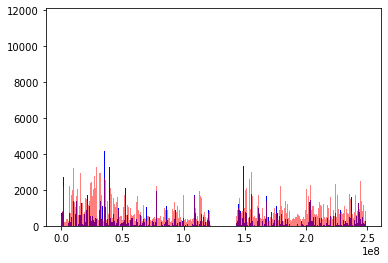

In [47]:
plt.hist(chr_bam['Start'].values, bins=1000, color = 'blue', label = 'minus reads')
plt.hist(flat_bed_pos, bins=1000, color = 'red', label = '5 prime TEs', alpha=0.5)
plt.show()

In [68]:
np.intersect1d(np.arange(26232,26252),flat_bed_pos)

array([26232, 26233, 26234, 26235, 26236, 26237, 26238, 26239, 26240,
       26241, 26242, 26243, 26244, 26245, 26246, 26247, 26248, 26249,
       26250, 26251])

In [62]:
chr_bed

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id
62510,chr10,26232,26252,-,AluSg4_dup3983,AluSg4,Alu,SINE
62511,chr10,51131,51151,-,AluSx1_dup62982,AluSx1,Alu,SINE
62512,chr10,53117,53137,-,AluSz_dup56227,AluSz,Alu,SINE
62513,chr10,54774,54794,-,AluSg7_dup4795,AluSg7,Alu,SINE
62514,chr10,59187,59207,-,AluSx1_dup62983,AluSx1,Alu,SINE
...,...,...,...,...,...,...,...,...
84813,chr10,133629677,133629697,-,AluJr4_dup12496,AluJr4,Alu,SINE
84814,chr10,133652401,133652421,-,AluSx3_dup19626,AluSx3,Alu,SINE
84815,chr10,133766857,133766877,-,AluY_dup64276,AluY,Alu,SINE
84816,chr10,133777194,133777214,-,AluY_dup64277,AluY,Alu,SINE


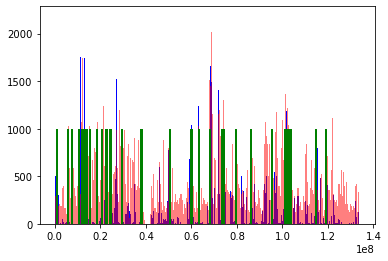

In [60]:
#add vertical lines to plot

plt.hist(chr_bam['Start'].values, bins=1000, color = 'blue', label = 'minus reads')
plt.hist(flat_bed_pos, bins=1000, color = 'red', label = '5 prime TEs', alpha=0.5)
for f in chr_bam['Start'].values[bam_bool]: plt.vlines(x = chr_bam['Start'].values[bam_bool], ymin = 0, ymax = 1000, color = 'green', alpha = 0.5)

plt.show()

In [ ]:
plt.hist(chr_bam['Start'].values[bam_bool], bins=1000, color = 'blue', label = 'minus reads')
plt.hist(flat_bed_pos, bins=1000, color = 'red', label = '5 prime TEs', alpha=0.5)
plt.show()

In [ ]:
np.intersect1d(chr_bam['Start'].values, flat_bed_pos)

In [40]:
sum(bam_bool)

126

In [38]:
chr_bam['Start'].values.shape

(350231,)

In [33]:
flat_bed_pos, flat_bed_ind

(array([    23119,     23120,     23121, ..., 248940611, 248940612,
        248940613]),
 array([    0,     0,     0, ..., 41163, 41163, 41163]))

In [20]:
bam_remaining = bam_final

#Mop up reads and their locations until none remaining
umi_v, bedind_v, ind_v = [],[],[]
#Loop until all reads have been accounted for
while len(bam_remaining) > 0:
    umi, bedind, ind = te.find_intersect(bam_remaining, flat_bed_pos, flat_bed_ind)
    umi_v = np.append(umi_v, umi) #UMIs of reads that have aligned to 5' ends
    bedind_v=np.append(bedind_v,bedind) #Indeces of chr_bed insertions where each UMI has aligned
    ind_v = np.append(ind_v, ind) # pandas row indeces of chr_bam file where each UMI comes from
    bam_remaining = bam_remaining.drop(ind) #Drop reads that have already been counted
bedind_v = bedind_v.astype(int)
assert len(bam_final) == len(umi_v) == len(bedind_v) == len(ind_v), 'Not all reads accounted for'
assert len(np.unique(ind_v)) == len(ind_v), 'Some reads counted twice'


#Sort by UMI
sort_umi, sort_bedind = adm.sort_2list(umi_v, bedind_v)

#Get counts!
#==============================================================================
slice_umi, slice_count= np.unique(sort_umi, return_counts=True) #Find unique multi-UMIs and their counts
counts_v = np.ones(len(sort_umi))

#Loop over multi-UMIs
for s in slice_umi[np.where(slice_count > 1)]:
    sort_umi_ind = np.ravel(np.argwhere(np.in1d(sort_umi,s))) #Indeces of sorted UMI list where current multi-UMI is found

    #Assert
    #Check that all identified multi-UMIs have at least 2 reads
    if len(sort_umi_ind) < 2:
        assert False, 'Identified multi-UMIs have only 1 or 0 reads'

    assert sum(counts_v[sort_umi_ind] != 1) == 0, str(x) #'This multi-UMIs has already been counted'
    counts_v[sort_umi_ind] = 1/len(sort_umi_ind) 

assert len(sort_umi) ==  len(sort_bedind) == counts_v.shape[0], 'Output vectors wrong shape'

curr_df = chr_bed.iloc[sort_bedind]
curr_df['Count'] = counts_v 
count_df = pd.concat([count_df, curr_df]) #Add them to the count matrix

In [61]:
count_df

""


In [24]:
_

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count
25559,chr1,16994241,16994261,-,AluSx_dup1367,AluSx,Alu,SINE,1.0
57767,chr1,224146702,224146722,-,AluSx4_dup873,AluSx4,Alu,SINE,1.0
27378,chr1,23729536,23729556,-,AluSx_dup1854,AluSx,Alu,SINE,1.0
39331,chr1,78024308,78024328,-,AluJo_dup3146,AluJo,Alu,SINE,1.0
39331,chr1,78024308,78024328,-,AluJo_dup3146,AluJo,Alu,SINE,1.0
...,...,...,...,...,...,...,...,...,...
41756,chr1,97208277,97208297,-,AluJo_dup3501,AluJo,Alu,SINE,1.0
41756,chr1,97208277,97208297,-,AluJo_dup3501,AluJo,Alu,SINE,1.0
41756,chr1,97208277,97208297,-,AluJo_dup3501,AluJo,Alu,SINE,1.0
46193,chr1,150591394,150591414,-,AluSx_dup6229,AluSx,Alu,SINE,1.0


In [32]:
np.unique(chr_bed['class_id'].values, return_counts=True)

(array(['LINE', 'SINE'], dtype=object), array([  288, 40876]))

In [10]:
#===================================================
def find_intersect(bam_remaining, flat_bed_pos, flat_bed_ind):
#===================================================

    """
    This function finds the intersection between a bam file and a flattened bed file of insertion positions, 
    and returns the UMIs, bed indeces, and bam indeces of the reads that overlap.

    Inputs:
    bam_remaining: bam file of reads that have not yet been counted
    chr_bed: bed file of insertions on a given chromosome
    flat_bed_pos: flattened vector of 5' insertion positions across all insertions in chr_bed
    flat_bed_ind: flattened vector of indeces for each region that maps it back onto the original chr bed file

    Outputs:
    umi: vector of UMIs that overlap with flattened bed
    bedind: vector of indeces in original bed file where umi_v reads have aligned
    ind: vector of pd row indeces of original bam file where reads have aligned

    """
    import numpy as np

    _int = np.intersect1d(bam_remaining['Start'].values, flat_bed_pos, return_indices=True)  #Find indeces (in the bam file of 5' aligned reads only) of reads whose tss overlaps with flattened bed vector
    umi = bam_remaining['UMI'].iloc[_int[1]].values #vector of UMIs that overlap with flattened bed
    bedind = flat_bed_ind[_int[2]] #vector of indeces in original bed file where umi_v reads have aligned
    ind = bam_remaining.index[_int[1]].values #vector of indeces of original bam file where reads have aligned
    assert len(umi) == len(bedind), 'Bam and bed slices not the same length'

    return(umi, bedind, ind)


In [ ]:



import numpy as np
import pandas as pd
import os
import sys
import te_rna_f as te
sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
from admin_tools import admin_functions as adm

# Filter out reads that do not overlap with 5' portion of insertion

#Generate flattened vector of 5' insertion positions and their indeces
all_bed_pos = np.asarray([(np.arange(chr_bed['Start'].values[i], chr_bed['End'].values[i]+1), np.full(chr_bed['End'].values[i]+1 - chr_bed['Start'].values[i],i)) for i in range(len(chr_bed))]) #list of all bed positions for each insertion and their indeces
assert len(all_bed_pos) == len(chr_bed), 'Not all bed positions accounted for'

flat_bed_pos = np.ravel(np.asarray(all_bed_pos)[:,0,:]) # flattened vector of all 5' regions across all insertions
flat_bed_ind = np.ravel(np.asarray(all_bed_pos)[:,1,:]) # flattened vector of indeces for each region that maps it back onto the original bed file
assert len(flat_bed_pos) == len(flat_bed_ind), 'Bed position and index vectors not the same length'

# get BAM file of final aligning reads
bam_bool = np.in1d(chr_bam['Start'].values, flat_bed_pos) #Boolean of indeces of reads whose tss overlaps with bed files
bam_final = chr_bam[bam_bool] #Final bam reads that have aligned to 5' ends


bam_remaining = bam_final

#Mop up reads and their locations until none remaining
umi_v, bedind_v, ind_v = [],[],[]
#Loop until all reads have been accounted for
while len(bam_remaining) > 0:
    umi, bedind, ind = te.find_intersect(bam_remaining, flat_bed_pos, flat_bed_ind)
    umi_v = np.append(umi_v, umi) #UMIs of reads that have aligned to 5' ends
    bedind_v=np.append(bedind_v,bedind) #Indeces of chr_bed insertions where each UMI has aligned
    ind_v = np.append(ind_v, ind) # pandas row indeces of chr_bam file where each UMI comes from
    bam_remaining = bam_remaining.drop(ind) #Drop reads that have already been counted
bedind_v = bedind_v.astype(int)
assert len(bam_final) == len(umi_v) == len(bedind_v) == len(ind_v), 'Not all reads accounted for'
assert len(np.unique(ind_v)) == len(ind_v), 'Some reads counted twice'


#Sort by UMI
sort_umi, sort_bedind = adm.sort_2list(umi_v, bedind_v)

#Get counts!
#==============================================================================
slice_umi, slice_count= np.unique(sort_umi, return_counts=True) #Find unique multi-UMIs and their counts
counts_v = np.ones(len(sort_umi))

#Loop over multi-UMIs
for s in slice_umi[np.where(slice_count > 1)]:
    sort_umi_ind = np.ravel(np.argwhere(np.in1d(sort_umi,s))) #Indeces of sorted UMI list where current multi-UMI is found

    #Assert
    #Check that all identified multi-UMIs have at least 2 reads
    if len(sort_umi_ind) < 2:
        assert False, 'Identified multi-UMIs have only 1 or 0 reads'

    assert sum(counts_v[sort_umi_ind] != 1) == 0, str(x) #'This multi-UMIs has already been counted'
    counts_v[sort_umi_ind] = 1/len(sort_umi_ind) 

assert len(sort_umi) ==  len(sort_bedind) == counts_v.shape[0], 'Output vectors wrong shape'

curr_df = chr_bed.iloc[sort_bedind]
curr_df['Count'] = counts_v 
count_df = pd.concat([count_df, curr_df]) #Add them to the count matrix


In [302]:
#=========================================
def five_prime_align(chr_bam, chr_bed,  count_df):
#=========================================
    """
    This function takes a bam file of reads and a bed file of TE insertions and
    filters out reads that do not overlap with the 5' portion of the TE insertion. 
    The output is a csv file of counts at each TE insertion. Multi-read UMIs have
    normalised counts by dividing by the number of multi-reads for each UMI.

    Inputs:
        chr_bam: bam file of reads aligned to a single chromosome
        chr_bed: bed file of TE insertions on a single chromosome
        count_df: dataframe of counts at each TE insertion

    Outputs:
        count_df: dataframe of counts at each TE insertion
    """

    import numpy as np
    import pandas as pd
    import os
    sys.path.insert(1, '/cndd3/dburrows/CODE/admin_tools/')
    from admin_tools import admin_functions as adm

    # Filter out reads that do not overlap with 5' portion of insertion

    #Generate flattened vector of 5' insertion positions and their indeces
    all_bed_pos = np.asarray([(np.arange(chr_bed['Start'].values[i], chr_bed['End'].values[i]+1), np.full(chr_bed['End'].values[i]+1 - chr_bed['Start'].values[i],i)) for i in range(len(chr_bed))]) #list of all bed positions for each insertion and their indeces
    assert len(all_bed_pos) == len(chr_bed), 'Not all bed positions accounted for'

    flat_bed_pos = np.ravel(np.asarray(all_bed_pos)[:,0,:]) # flattened vector of all 5' regions across all insertions
    flat_bed_ind = np.ravel(np.asarray(all_bed_pos)[:,1,:]) # flattened vector of indeces for each region that maps it back onto the original bed file
    assert len(flat_bed_pos) == len(flat_bed_ind), 'Bed position and index vectors not the same length'

    # get BAM file of final aligning reads
    bam_bool = np.in1d(chr_bam['Start'].values, flat_bed_pos) #Boolean of indeces of reads whose tss overlaps with bed files
    bam_final = chr_bam[bam_bool] #Final bam reads that have aligned to 5' ends


    bam_remaining = bam_final

    #Mop up reads and their locations until none remaining
    umi_v, bedind_v, ind_v = [],[],[]
    #Loop until all reads have been accounted for
    while len(bam_remaining) > 0:
        umi, bedind, ind = te.find_intersect(bam_remaining, chr_bed, flat_bed_pos, flat_bed_ind)
        umi_v = np.append(umi_v, umi) #UMIs of reads that have aligned to 5' ends
        bedind_v=np.append(bedind_v,bedind) #Indeces of chr_bed insertions where each UMI has aligned
        ind_v = np.append(ind_v, ind) # pandas row indeces of chr_bam file where each UMI comes from
        bam_remaining = bam_remaining.drop(ind) #Drop reads that have already been counted
    bedind_v = bedind_v.astype(int)
    assert len(bam_final) == len(umi_v) == len(bedind_v) == len(ind_v), 'Not all reads accounted for'
    assert len(np.unique(ind_v)) == len(ind_v), 'Some reads counted twice'


    #Sort by UMI
    sort_umi, sort_bedind = adm.sort_2list(umi_v, bedind_v)

    #Get counts!
    #==============================================================================
    slice_umi, slice_count= np.unique(sort_umi, return_counts=True) #Find unique multi-UMIs and their counts
    counts_v = np.ones(len(sort_umi))

    #Loop over multi-UMIs
    for s in slice_umi[np.where(slice_count > 1)]:
        sort_umi_ind = np.ravel(np.argwhere(np.in1d(sort_umi,s))) #Indeces of sorted UMI list where current multi-UMI is found

        #Assert
        #Check that all identified multi-UMIs have at least 2 reads
        if len(sort_umi_ind) < 2:
            assert False, 'Identified multi-UMIs have only 1 or 0 reads'

        assert sum(counts_v[sort_umi_ind] != 1) == 0, str(x) #'This multi-UMIs has already been counted'
        counts_v[sort_umi_ind] = 1/len(sort_umi_ind) 

    assert len(sort_umi) ==  len(sort_bedind) == counts_v.shape[0], 'Output vectors wrong shape'

    curr_df = chr_bed.iloc[sort_bedind]
    curr_df['Count'] = counts_v 
    count_df = pd.concat([count_df, curr_df]) #Add them to the count matrix

    return(count_df)

In [297]:
count_df

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id,Count
490433,chrY,5687321,5687341,+,AluY_dup58924,AluY,Alu,SINE,1.0
492393,chrY,23753362,23753382,+,AluYa5_dup2407,AluYa5,Alu,SINE,0.5
492393,chrY,23753362,23753382,+,AluYa5_dup2407,AluYa5,Alu,SINE,0.5
491957,chrY,18953808,18953828,+,AluSg4_dup3964,AluSg4,Alu,SINE,1.0
491080,chrY,12405313,12405333,+,AluSx1_dup62651,AluSx1,Alu,SINE,1.0
...,...,...,...,...,...,...,...,...,...
491070,chrY,12383648,12383668,+,AluSx_dup63146,AluSx,Alu,SINE,1.0
490974,chrY,11935477,11935497,+,AluYa5_dup2374,AluYa5,Alu,SINE,1.0
490394,chrY,5244328,5244348,+,L1PA13_dup5933,L1PA13,L1,LINE,1.0
490394,chrY,5244328,5244348,+,L1PA13_dup5933,L1PA13,L1,LINE,1.0


In [254]:
#count the number of occurences of each gene_id in pandas dataframe
cat_df.groupby('cluster').sum()['plaque']


chr_bed.iloc[sort_bedind]

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id
61534,chr1,240195735,240195755,+,AluJo_dup6673,AluJo,Alu,SINE
22163,chr1,1357526,1357546,+,AluSx1_dup79,AluSx1,Alu,SINE
62249,chr1,243435188,243435208,+,MIR_dup15980,MIR,MIR,SINE
51016,chr1,172601207,172601227,+,AluSz_dup6301,AluSz,Alu,SINE
34831,chr1,46158806,46158826,+,AluSx3_dup949,AluSx3,Alu,SINE
...,...,...,...,...,...,...,...,...
61270,chr1,238133423,238133443,+,AluY_dup8408,AluY,Alu,SINE
39373,chr1,75463139,75463159,+,AluYk11_dup45,AluYk11,Alu,SINE
52206,chr1,180067406,180067426,+,AluSq_dup1218,AluSq,Alu,SINE
62867,chr1,246472460,246472480,+,AluJb_dup11878,AluJb,Alu,SINE


In [252]:
sort_bedind

[39584,
 213,
 40299,
 29066,
 12881,
 35362,
 39760,
 17628,
 32147,
 26296,
 33251,
 16413,
 31338,
 29041,
 37230,
 29452,
 29452,
 39621,
 30009,
 17172,
 17588,
 9790,
 33582,
 19028,
 37792,
 13666,
 28369,
 14323,
 23337,
 1532,
 1532,
 1532,
 32774,
 32774,
 14811,
 23366,
 26579,
 23385,
 18143,
 31827,
 17195,
 25262,
 39502,
 14811,
 9936,
 548,
 16239,
 17866,
 22387,
 8372,
 38708,
 40944,
 37875,
 37392,
 37392,
 33855,
 33774,
 11109,
 15829,
 15829,
 10893,
 6440,
 3508,
 4101,
 6129,
 17689,
 39225,
 39801,
 8274,
 18741,
 9898,
 9898,
 32789,
 3463,
 2287,
 16968,
 32575,
 26,
 82,
 128,
 23767,
 40677,
 39576,
 39206,
 39769,
 3516,
 9534,
 158,
 4029,
 25180,
 21424,
 867,
 16487,
 11171,
 11264,
 15030,
 3482,
 24508,
 14988,
 16902,
 12709,
 41075,
 30317,
 30317,
 11760,
 16537,
 30306,
 39277,
 39177,
 14988,
 16530,
 30960,
 35084,
 24465,
 33739,
 23796,
 39476,
 39476,
 29581,
 23762,
 11635,
 18081,
 11303,
 10938,
 18286,
 25198,
 30235,
 39769,
 29063,
 39

In [241]:
chr_bed

,Chromosome,Start,End,Strand,transcript_id,gene_id,family_id,class_id
21950,chr1,26790,26810,+,AluSp_dup11,AluSp,Alu,SINE
21951,chr1,31435,31455,+,AluJo_dup14,AluJo,Alu,SINE
21952,chr1,39623,39643,+,AluSx_dup21,AluSx,Alu,SINE
21953,chr1,51584,51604,+,AluYj4,AluYj4,Alu,SINE
21954,chr1,70722,70742,+,MIRb_dup30,MIRb,MIR,SINE
...,...,...,...,...,...,...,...,...
63292,chr1,248889104,248889124,+,AluSg_dup3317,AluSg,Alu,SINE
63293,chr1,248891547,248891567,+,AluJr_dup7183,AluJr,Alu,SINE
63294,chr1,248901986,248902006,+,AluSz_dup8953,AluSz,Alu,SINE
63295,chr1,248916131,248916151,+,AluSc8_dup1832,AluSc8,Alu,SINE


In [236]:
np.max(sort_bedind)

41345

In [228]:
#Create output dataframe
out_df = pd.DataFrame({'UMI':sort_umi, 'BedInd':sort_bedind, 'Count':counts_v})

True

In [ ]:
#EXTRACT READ NAMES
#samtools view 1241-GABA.sub.plus.filt.bam |cut -f 1 > read_names.txt

In [ ]:
#EXTRACT START POS
samtools view 1241-GABA.sub.plus.filt.bam | cut -f 4 > start_pos.txt

In [29]:
ss = pd.read_csv('/cndd3/dburrows/DATA/te/rna/aligned.subset/1241-GABA.plus.start_pos.txt', sep='\t', header=None)
ss

,0
0,120890
1,139805
2,139805
3,139805
4,139807
...,...
64333,22040905
64334,22040907
64335,23650195
64336,23650197


In [76]:
len(pdf[0].values)

670

In [32]:
ss[rem_bool][0].values

array([  120890,   139805,   139805, ..., 23650195, 23650197, 26593990])

In [33]:
#Make txt file of start sites to remove
np.savetxt('/cndd3/dburrows/DATA/te/rna/aligned.subset/1241-GABA.plus.filt_ss.txt',  ss[rem_bool][0].values, fmt='%s')

In [ ]:
#Make txt file of start sites to remove
np.savetxt('/cndd3/dburrows/DATA/te/rna/aligned.subset/1241-GABA.plus.filt_ss.txt',  ss[rem_bool][0].values, fmt='%s')

#Filter by start pos
samtools view -h 1241-GABA.plus.filt.bam| awk 'NR==FNR{a[$1];next} !($4 in a)' 1241-GABA.plus.filt_ss.txt - > 1241-GABA.plus.ss_filt.sam
samtools view -S -b 1241-GABA.plus.ss_filt.sam > 1241-GABA.plus.ss_filt.bam
samtools index 1241-GABA.plus.ss_filt.bam

In [34]:
#Check that filtering retained correct cells
final_bam = pr.read_bam('/cndd3/dburrows/DATA/te/rna/aligned.subset/1241-GABA.plus.ss_filt.bam', as_df=True)

#Check that start and end positions are retained
assert sum(filt_bam[keep_bool]['Start'].values - final_bam['Start'].values) == 0
assert sum(filt_bam[keep_bool]['End'].values - final_bam['End'].values) == 0

In [35]:
#Check that they all overlap the start
allow = 1
bed_pos = np.concatenate([np.arange(np.asarray(bed_plus['Start'])[i],np.asarray(bed_plus['End'])[i]+1) for i in range(len(bed_plus))])
final_bam_pos = [np.arange(np.asarray(final_bam['Start'])[i],np.asarray(final_bam['Start'])[i]+allow) for i in range(len(final_bam))]
assert sum([len(np.intersect1d(final_bam_pos[i], bed_pos))==0 for i in range(len(final_bam_pos))]) == 0

In [ ]:
TEcount --sortByPos --format BAM --mode multi -b /cndd3/dburrows/DATA/te/rna/aligned.subset/1241-GABA.plus.ss_filt.bam --GTF /cndd3/dburrows/DATA/te/gtf/annotations/gencode/gencode.v37.annotation.hg38.gtf --TE /cndd3/dburrows/DATA/te/gtf/annotations/rmsk/rmsk.hg38.gtf --project 1241-GABA.plus.ss_filt --outdir /cndd3/dburrows/DATA/te/rna/tet_counts.subset/


In [36]:
final_bam

,Chromosome,Start,End,Strand,Flag
0,chr1,485206,738869,+,355
1,chr1,485206,738869,+,355
2,chr1,41176265,41176360,+,99
3,chr1,41176265,41176360,+,99
4,chr1,41176266,41176363,+,99
...,...,...,...,...,...
2964,chrY,18893917,18894014,+,99
2965,chrY,18893917,18894014,+,99
2966,chrY,20477159,20477254,+,99
2967,chrY,20528204,20528300,+,99


In [13]:
#Compute counts
final_bam = pr.read_bam('/cndd3/dburrows/DATA/te/rna/aligned.subset/1241-GABA.plus.ss_filt.bam', as_df=True)
final_bam.shape

(2969, 5)

In [15]:
final_bam

,Chromosome,Start,End,Strand,Flag
0,chr1,485206,738869,+,355
1,chr1,485206,738869,+,355
2,chr1,41176265,41176360,+,99
3,chr1,41176265,41176360,+,99
4,chr1,41176266,41176363,+,99
...,...,...,...,...,...
2964,chrY,18893917,18894014,+,99
2965,chrY,18893917,18894014,+,99
2966,chrY,20477159,20477254,+,99
2967,chrY,20528204,20528300,+,99


In [ ]:
#Read ids of each row from final_bam (generate?)

#Bed file that filtering was performed on -> loop through each L1 and look for intersection

#Normalise by n of read id

#Group by type -> visualise. 

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  1.,  9., 23., 41., 17.]),
 array([ 41.  ,  42.18,  43.36,  44.54,  45.72,  46.9 ,  48.08,  49.26,
         50.44,  51.62,  52.8 ,  53.98,  55.16,  56.34,  57.52,  58.7 ,
         59.88,  61.06,  62.24,  63.42,  64.6 ,  65.78,  66.96,  68.14,
         69.32,  70.5 ,  71.68,  72.86,  74.04,  75.22,  76.4 ,  77.58,
         78.76,  79.94,  81.12,  82.3 ,  83.48,  84.66,  85.84,  87.02,
         88.2 ,  89.38,  90.56,  91.74,  92.92,  94.1 ,  95.28,  96.46,
         97.64,  98.82, 100.  ]),
 <BarContainer object of 50 artists>)

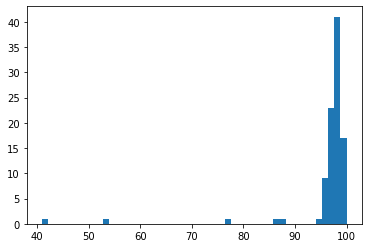

In [26]:
length = np.asarray([len(i) for i in filt_bam_pos])
plt.hist(length[length<1000], bins=50)

In [ ]:
# What proportion of remaining filt bam reads, have their start site overlapping with corresponding bed file, or is it downstream?



In [ ]:
# FILTER BAM FILE BEFORE FILTERING -> CHANGE END POSITION TO START POSITION + 1?

In [ ]:
# What proportion of remaining filt bam reads, have their start site overlapping with corresponding bed file, or is it downstream?

In [ ]:
#SANITY CHECK WRITE FUNCTION
flat = np.concatenate([np.arange(np.asarray(L1_bed['Start'])[i],np.asarray(L1_bed['End'])[i]) for i in range(len(L1_bed))])
flat

In [69]:
ok = filt_bam['End'].values - filt_bam['Start'].values
sum(ok < 150)

96

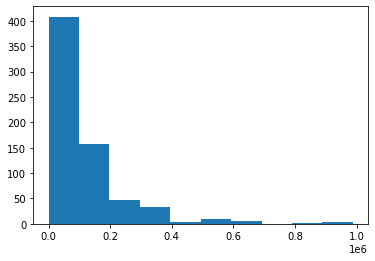

In [40]:
plt.hist(filt_bam['End'].values - filt_bam['Start'].values)
plt.show()

In [23]:
filt_bam

,Chromosome,Start,End,Strand,Flag
0,chr1,139807,732073,+,99
1,chr1,495009,732073,+,355
2,chr1,34089149,34164963,+,99
3,chr1,49045707,49245773,+,99
4,chr1,49045760,49245827,+,99
...,...,...,...,...,...
665,chrX,123645352,123665714,+,99
666,chrX,123645362,123665724,+,99
667,chrX,124737165,124869004,+,99
668,chrX,124737183,124869023,+,99


In [35]:
#SANITY CHECK WRITE FUNCTION
flat = np.concatenate([np.arange(np.asarray(L1_bed['Start'])[i],np.asarray(L1_bed['End'])[i]) for i in range(len(L1_bed))])
flat

array([100199602, 100199603, 100199604, ...,   9961631,   9961632,
         9961633])

In [ ]:
fill = np.concatenate([np.full(np.asarray(L1_filt['End'])[i] - np.asarray(L1_filt['Start'])[i], L1_filt['gene_id'].iloc[i]) for i in range(len(L1_filt))])
fill

In [67]:
flat = np.concatenate([np.arange(np.asarray(L1_filt['Start'])[i],np.asarray(L1_filt['End'])[i]) for i in range(len(L1_filt))])
flat

array([100199602, 100199603, 100199604, ...,   9967747,   9967748,
         9967749])

In [95]:
fill = np.concatenate([np.full(np.asarray(L1_filt['End'])[i] - np.asarray(L1_filt['Start'])[i], L1_filt['gene_id'].iloc[i]) for i in range(len(L1_filt))])
fill

array(['L1PA7', 'L1PA7', 'L1PA7', ..., 'L1PA3', 'L1PA3', 'L1PA3'],
      dtype='<U9')

In [96]:
fill.shape, flat.shape

((55164410,), (55164410,))

In [74]:
inter_f

array([     1737,      1742,      1745, ..., 248532875, 248766330,
       248766359])

In [61]:
L1_filt['Start'],L1_filt['End']

(455        100199602
 1260       100598238
 1328       100632238
 1368       100662981
 1385       100676926
              ...    
 4691434      8134318
 4691524      8193466
 4692463      8943046
 4693438      9941130
 4693455      9961614
 Name: Start, Length: 8991, dtype: int64,
 455        100206088
 1260       100604384
 1328       100638390
 1368       100669120
 1385       100682490
              ...    
 4691434      8140335
 4691524      8199588
 4692463      8949182
 4693438      9947151
 4693455      9967750
 Name: End, Length: 8991, dtype: int64)

In [98]:
bam = pr.read_bam('/cndd3/dburrows/DATA/te/rna/aligned.prac/6285-GABA.subsampled.bam', as_df=True)
bam

[E::hts_open_format] Failed to open file "/cndd3/dburrows/DATA/te/rna/aligned.prac/6285-GABA.subsampled.bam" : No such file or directory


FileNotFoundError: [Errno 2] could not open alignment file `/cndd3/dburrows/DATA/te/rna/aligned.prac/6285-GABA.subsampled.bam`: No such file or directory

In [98]:
fill, flat

(array(['L1PA7', 'L1PA7', 'L1PA7', ..., 'L1PA3', 'L1PA3', 'L1PA3'],
       dtype='<U9'),
 array([100199602, 100199603, 100199604, ...,   9967747,   9967748,
          9967749]))

In [9]:
inter = np.intersect1d(np.asarray(bam['Start']),np.asarray(L1_filt['Start']))

In [68]:
inter_f = np.intersect1d(np.asarray(bam['Start']),flat)
inter_f

array([     1737,      1742,      1745, ..., 248532875, 248766330,
       248766359])

In [127]:
len(flat)

55164410

In [129]:
bool_f = np.in1d(flat,np.asarray(bam['Start']))

In [121]:
ind_f = np.argwhere(np.in1d(np.asarray(bam['Start']),flat))

In [130]:
fill_n = fill[bool_f]
fill_n

array(['L1PA7', 'L1PA7', 'L1PA7', ..., 'L1PA3', 'L1PA3', 'L1PA3'],
      dtype='<U9')

In [ ]:
sum()

In [131]:
fill_n.shape

(918359,)

In [115]:
len(inter_f)

707379

In [117]:
fill_n = []
for i in range(len(inter_f)):
    fill_n = np.append(fill_n, fill[np.where(flat == inter_f[i])[0][0]])
    if i == 100000 or i == 200000 or i == 500000:
        print(i)


KeyboardInterrupt: 

In [119]:
fill_n.shape

(2605,)

In [105]:
fill[np.where(flat == inter_f[i])[0][0]] 

'L1PA3'

In [72]:
index_f = [np.where(L1_filt['Start'] == i)[0][0] for i in inter_f]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [69]:
inter_f.shape

(707379,)

In [ ]:
empty_arr = []
for i in index:
    empty_arr=np.append(empty_arr, L1_filt.iloc[i]['gene_id'])

In [71]:
len(index)

144

In [10]:
index = [np.where(L1_filt['Start'] == i)[0][0] for i in inter]
index

[2277,
 2477,
 5981,
 901,
 1780,
 7542,
 7540,
 2276,
 6595,
 2279,
 3744,
 7878,
 6557,
 7891,
 3795,
 2862,
 4527,
 7876,
 7160,
 7524,
 2928,
 2275,
 2274,
 6589,
 7105,
 4237,
 8951,
 4297,
 7267,
 8965,
 3549,
 1245,
 2847,
 2854,
 3750,
 8844,
 8164,
 3751,
 1435,
 5535,
 1024,
 1025,
 8227,
 3258,
 650,
 7168,
 2873,
 2506,
 8928,
 6228,
 1826,
 6229,
 4239,
 3688,
 2044,
 2715,
 2622,
 6824,
 1486,
 8268,
 7719,
 7721,
 7722,
 4965,
 8273,
 7728,
 2643,
 7223,
 2087,
 1517,
 1863,
 2757,
 3458,
 4321,
 1554,
 2768,
 2541,
 2543,
 387,
 1157,
 394,
 2777,
 2357,
 5027,
 8402,
 765,
 5755,
 769,
 2669,
 6339,
 7350,
 2216,
 8487,
 8494,
 5128,
 4407,
 2407,
 7373,
 2226,
 5829,
 1958,
 5169,
 8581,
 479,
 8611,
 5189,
 2846,
 6432,
 6433,
 7810,
 4443,
 6960,
 7831,
 5908,
 8769,
 7018,
 8778,
 7506,
 890,
 4520,
 1773,
 5289,
 7550,
 1386,
 4556,
 6011,
 4571,
 3878,
 7970,
 4624,
 8029,
 77,
 4675,
 7120,
 4684,
 7126,
 8107,
 3036,
 8172,
 5486,
 3164,
 4116,
 6199,
 3354]

In [13]:
L1_filt.iloc[0]['gene_id']

'L1PA7'

In [15]:
empty_arr = []
for i in index:
    empty_arr=np.append(empty_arr, L1_filt.iloc[i]['gene_id'])

In [136]:
for bun in unq[0]:
    

array(['L1HS', 'L1MA1', 'L1MA2', 'L1MA3', 'L1P1', 'L1P4e', 'L1PA13',
       'L1PA15', 'L1PA16', 'L1PA2', 'L1PA3', 'L1PA4', 'L1PA5', 'L1PA6',
       'L1PA7', 'L1PA8', 'L1PA8A', 'L1PB1', 'L1PB4', 'L1PREC2'],
      dtype='<U32')

In [139]:
unq[0][0]

'L1HS'

In [142]:
for np.where(unq1[0] == unq[0][0])[0][0]

0

In [132]:
unq1=np.unique(fill_n, return_counts=True)
unq1

(array(['L1HS', 'L1M1', 'L1M2', 'L1M2a', 'L1M2a1', 'L1M2c', 'L1M3c',
        'L1M3d', 'L1M3f', 'L1M4', 'L1M4b', 'L1MA1', 'L1MA10', 'L1MA2',
        'L1MA3', 'L1MA4', 'L1MA4A', 'L1MA5', 'L1MA5A', 'L1MA6', 'L1MA7',
        'L1MA8', 'L1MA9', 'L1MB1', 'L1MB2', 'L1MB3', 'L1MB4', 'L1MB7',
        'L1MC1', 'L1MC2', 'L1MC3', 'L1MD1', 'L1MDa', 'L1ME1', 'L1ME2',
        'L1P1', 'L1P2', 'L1P3', 'L1P4a', 'L1P4e', 'L1PA10', 'L1PA11',
        'L1PA12', 'L1PA13', 'L1PA14', 'L1PA15', 'L1PA15-16', 'L1PA16',
        'L1PA17', 'L1PA2', 'L1PA3', 'L1PA4', 'L1PA5', 'L1PA6', 'L1PA7',
        'L1PA8', 'L1PA8A', 'L1PB1', 'L1PB2', 'L1PB3', 'L1PB4', 'L1PBa',
        'L1PBa1', 'L1PBb', 'L1PREC2'], dtype='<U9'),
 array([ 43487,   2970,    371,    288,    217,    348,     53,     28,
            57,      7,    106,   7106,     66,   9219,   8143,   3072,
          2443,   1384,    234,    364,    427,    331,    741,     60,
            43,    448,     51,    155,    384,    281,    762,     72,
           250,    

In [133]:
data1 = {}
for u in range(len(unq1[0])): 
    data1.update({unq1[0][u]: 1000000*(unq1[1][u]/3741889)})
data1

{'L1HS': 11621.670231265545,
 'L1M1': 793.7167564297071,
 'L1M2': 99.14778337892973,
 'L1M2a': 76.96647335075947,
 'L1M2a1': 57.99209971220418,
 'L1M2c': 93.00115529883435,
 'L1M3c': 14.163969054132819,
 'L1M3d': 7.482851575768282,
 'L1M3f': 15.232947850671145,
 'L1M4': 1.8707128939420705,
 'L1M4b': 28.327938108265638,
 'L1MA1': 1899.0408320503361,
 'L1MA10': 17.63815014288238,
 'L1MA2': 2463.7288813217065,
 'L1MA3': 2176.173585052897,
 'L1MA4': 820.9757157414343,
 'L1MA4A': 652.8787999857825,
 'L1MA5': 369.86666360226076,
 'L1MA5A': 62.53525959749207,
 'L1MA6': 97.27707048498766,
 'L1MA7': 114.1134865304663,
 'L1MA8': 88.45799541354647,
 'L1MA9': 198.02832205872488,
 'L1MB1': 16.03468194807489,
 'L1MB2': 11.491522062787004,
 'L1MB3': 119.72562521229251,
 'L1MB4': 13.629479655863655,
 'L1MB7': 41.42292836586013,
 'L1MC1': 102.62196446767929,
 'L1MC2': 75.0957604568174,
 'L1MC3': 203.6404607405511,
 'L1MD1': 19.241618337689868,
 'L1MDa': 66.81117478364537,
 'L1ME1': 65.74219598710704,
 

In [147]:
data1.keys(),data.keys()

(dict_keys(['L1HS', 'L1M1', 'L1M2', 'L1M2a', 'L1M2a1', 'L1M2c', 'L1M3c', 'L1M3d', 'L1M3f', 'L1M4', 'L1M4b', 'L1MA1', 'L1MA10', 'L1MA2', 'L1MA3', 'L1MA4', 'L1MA4A', 'L1MA5', 'L1MA5A', 'L1MA6', 'L1MA7', 'L1MA8', 'L1MA9', 'L1MB1', 'L1MB2', 'L1MB3', 'L1MB4', 'L1MB7', 'L1MC1', 'L1MC2', 'L1MC3', 'L1MD1', 'L1MDa', 'L1ME1', 'L1ME2', 'L1P1', 'L1P2', 'L1P3', 'L1P4a', 'L1P4e', 'L1PA10', 'L1PA11', 'L1PA12', 'L1PA13', 'L1PA14', 'L1PA15', 'L1PA15-16', 'L1PA16', 'L1PA17', 'L1PA2', 'L1PA3', 'L1PA4', 'L1PA5', 'L1PA6', 'L1PA7', 'L1PA8', 'L1PA8A', 'L1PB1', 'L1PB2', 'L1PB3', 'L1PB4', 'L1PBa', 'L1PBa1', 'L1PBb', 'L1PREC2']),
 dict_keys(['L1HS', 'L1MA1', 'L1MA2', 'L1MA3', 'L1P1', 'L1P4e', 'L1PA13', 'L1PA15', 'L1PA16', 'L1PA2', 'L1PA3', 'L1PA4', 'L1PA5', 'L1PA6', 'L1PA7', 'L1PA8', 'L1PA8A', 'L1PB1', 'L1PB4', 'L1PREC2']))

In [165]:
data_p = {}
for d in data1.keys():
    if d in data.keys():
        data_p.update({d: (data[d]/data1[d])*100})



In [166]:
data_p

{'L1HS': 0.013797226757421756,
 'L1MA1': 0.028145229383619477,
 'L1MA2': 0.010847163466753445,
 'L1MA3': 0.024560972614515533,
 'L1P1': 0.020242914979757082,
 'L1P4e': 0.7299270072992701,
 'L1PA13': 0.02462447672986949,
 'L1PA15': 0.014076576576576577,
 'L1PA16': 0.03695491500369549,
 'L1PA2': 0.020968565385456932,
 'L1PA3': 0.010930156301235108,
 'L1PA4': 0.020029167475135664,
 'L1PA5': 0.014911426128794958,
 'L1PA6': 0.015147278150633853,
 'L1PA7': 0.017130070768604864,
 'L1PA8': 0.005526083112290008,
 'L1PA8A': 0.008167932696234583,
 'L1PB1': 0.019871234401080996,
 'L1PB4': 0.06309148264984228,
 'L1PREC2': 0.02206044562100154}

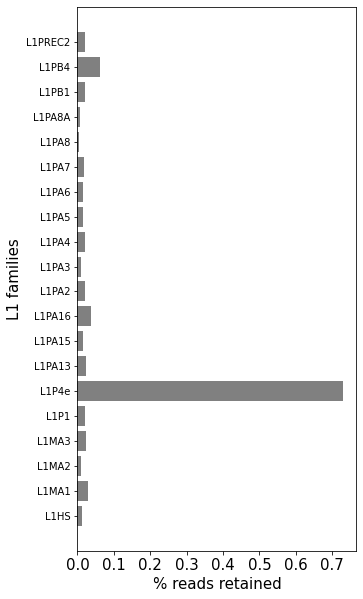

In [172]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating the dataset
courses = list(data_p.keys())
values = list(data_p.values())
  
fig = plt.figure(figsize = (5, 10))
 
# creating the bar plot
plt.barh(courses, values, color='grey')


plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("% reads retained", fontsize=15)
plt.ylabel("L1 families", fontsize=15)
plt.savefig(s_fig + '/L1_retained.svg', transparent=True)
plt.show()

In [ ]:
data1 = {}
for u in range(len(unq1[0])): 
    data1.update({unq1[0][u]: 1000000*(unq1[1][u]/3741889)})
data1

In [150]:
if 'L1M1' in data.keys():
    print('ok')

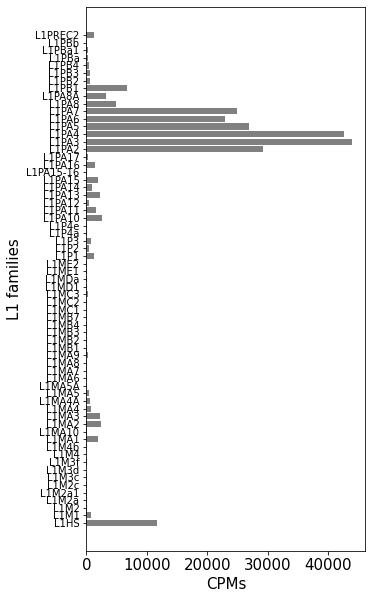

In [135]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating the dataset
courses = list(data1.keys())
values = list(data1.values())
  
fig = plt.figure(figsize = (5, 10))
 
# creating the bar plot
plt.barh(courses, values, color='grey')


plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("CPMs", fontsize=15)
plt.ylabel("L1 families", fontsize=15)
#plt.savefig(s_fig + '/L1_CPMs.svg', transparent=True)
plt.show()

In [21]:
unq=np.unique(empty_arr, return_counts=True)
unq

(array(['L1HS', 'L1MA1', 'L1MA2', 'L1MA3', 'L1P1', 'L1P4e', 'L1PA13',
        'L1PA15', 'L1PA16', 'L1PA2', 'L1PA3', 'L1PA4', 'L1PA5', 'L1PA6',
        'L1PA7', 'L1PA8', 'L1PA8A', 'L1PB1', 'L1PB4', 'L1PREC2'],
       dtype='<U32'),
 array([ 6,  2,  1,  2,  1,  1,  2,  1,  2, 23, 18, 32, 15, 13, 16,  1,  1,
         5,  1,  1]))

In [26]:
unq[0][0]

'L1HS'

In [47]:
data = {}
for u in range(len(unq[0])): 
    data.update({unq[0][u]: 1000000*(unq[1][u]/3741889)})
data

{'L1HS': 1.603468194807489,
 'L1MA1': 0.534489398269163,
 'L1MA2': 0.2672446991345815,
 'L1MA3': 0.534489398269163,
 'L1P1': 0.2672446991345815,
 'L1P4e': 0.2672446991345815,
 'L1PA13': 0.534489398269163,
 'L1PA15': 0.2672446991345815,
 'L1PA16': 0.534489398269163,
 'L1PA2': 6.1466280800953745,
 'L1PA3': 4.810404584422467,
 'L1PA4': 8.551830372306608,
 'L1PA5': 4.008670487018723,
 'L1PA6': 3.4741810887495594,
 'L1PA7': 4.275915186153304,
 'L1PA8': 0.2672446991345815,
 'L1PA8A': 0.2672446991345815,
 'L1PB1': 1.3362234956729075,
 'L1PB4': 0.2672446991345815,
 'L1PREC2': 0.2672446991345815}

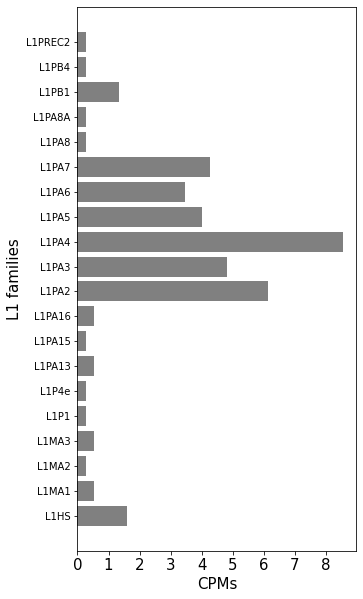

In [59]:
import numpy as np
import matplotlib.pyplot as plt
 
# creating the dataset
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (5, 10))
 
# creating the bar plot
plt.barh(courses, values, color='grey')
plt.xticks(fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("CPMs", fontsize=15)
plt.ylabel("L1 families", fontsize=15)
plt.savefig(s_fig + '/L1_CPMs.svg', transparent=True)
plt.show()

In [111]:
L = prac1[prac1['class_id'] == 'LINE']
S = prac1[prac1['class_id'] == 'SINE']

In [114]:
#Calculate the size of each insertion
L_length = (L['End'] - L['Start'])
S_length = (S['End'] - S['Start'])
#print('Number of insertions removed: ', len(prac1) - len(prac1[index]))
#print('Number of insertions kept: ', len(prac1[index]))

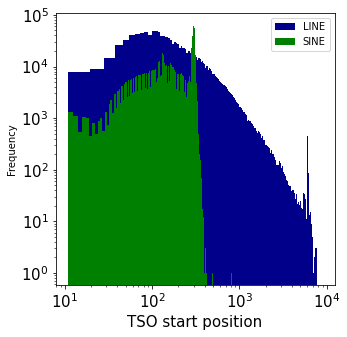

In [122]:
fig,ax = plt.subplots(figsize=(5,5))
plt.hist(L_length, bins=1000, color='darkblue', label='LINE')
plt.hist(S_length, bins=500, color='green', label='SINE')

plt.xlabel('TSO start position', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency', fontsize=10)
plt.legend(prop={'size': 10})
plt.xscale('log')
plt.yscale('log')
plt.savefig(s_fig + '/TE_lengths.svg', transparent=True)
plt.show()

In [ ]:
# Filter by insertion size
filt_prac1 = prac1[index]
filt_prac1

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,100206088,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,100604384,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,100638390,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,100669120,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,100682490,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,9288557,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,9947151,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,9967750,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,9980574,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


In [ ]:
#Convert End values to Start + shift
nbase_shift = 20
filt_prac1['End']=filt_prac1['Start'] + nbase_shift
filt_prac1

/tmp/ipykernel_2369450/3127570340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_prac1['End']=filt_prac1['Start'] + nbase_shift


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,100199622,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,100598258,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,100632258,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,100663001,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,100676946,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,9280876,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,9941150,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,9961634,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,9973857,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,transcript_id,family_id,class_id
455,chr1,hg38_rmsk,exon,100199602,0,22308,+,.,L1PA7,L1PA7_dup342,L1,LINE
1260,chr1,hg38_rmsk,exon,100598238,0,25226,-,.,L1PA5,L1PA5_dup292,L1,LINE
1328,chr1,hg38_rmsk,exon,100632238,0,25354,-,.,L1PA3,L1PA3_dup292,L1,LINE
1368,chr1,hg38_rmsk,exon,100662981,0,25118,-,.,L1PA4,L1PA4,L1,LINE
1385,chr1,hg38_rmsk,exon,100676926,0,26591,-,.,L1PA3,L1PA3_dup293,L1,LINE
...,...,...,...,...,...,...,...,...,...,...,...,...
4692835,chrY,hg38_rmsk,exon,9280856,0,20069,-,.,HERVE-int,HERVE-int_dup168,ERV1,LTR
4693438,chrY,hg38_rmsk,exon,9941130,0,28575,+,.,L1HS,L1HS_dup1116,L1,LINE
4693455,chrY,hg38_rmsk,exon,9961614,0,26510,-,.,L1PA3,L1PA3_dup7210,L1,LINE
4693468,chrY,hg38_rmsk,exon,9973837,0,38950,+,.,HERVK22-int,HERVK22-int_dup243,ERVK,LTR


# TE RNA over lifespan

In [190]:
#=======================================================================
def TE_sweep(tet_df, name): 
#=======================================================================
    """
    This function sums up TE counts over different TE elements.
    
    Inputs:
    tet_df (dataframe): dataframe of genes x counts, output from TE_transcripts
    str
    
    Returns:
    """
    

    sum_counts = sum(tet_df['counts'][tet_df['gene'].str.contains(name, case=False)])/sum(tet_df['counts'])*1000000

    return(sum_counts)


In [ ]:
def calculate_age(milli_div, subsitution_rate=2.2):
    p = milli_div / 1000  # The milliDiv column in the `rmsk.txt` file.
    p_part = (4 / 3) * p
    jc_dist = -0.75 * (log(1 - p_part))
    (jc_dist * 100) / (subsitution_rate * 2 * 100) * 1000
    return jc_dist


def read_rmsk(filename: str):
    # read first line to check if it is a valid rmsk file
    if filename.endswith(".gz"):
        with gzip.open(filename) as f:
            line = f.readline()
    else:
        with open(filename) as f:
            line = f.readline()

        assert (
            line
            == "   SW  perc perc perc  query      position in query           matching       repeat              position in  repeat\n"
        ), "Not a valid rmsk file"

    # setup converter functions
    strand_conv = lambda x: "-" if x == "C" else "+"
    coord_conv = lambda x: int(x.rstrip(")").lstrip("("))
    perc_conv = lambda x: float(x) * 10

    convs = {
        "milliDiv": perc_conv,
        "milliDel": perc_conv,
        "milliIns": perc_conv,
        "genoLeft": coord_conv,
        "strand": strand_conv,
        "repStart": coord_conv,
        "repLeft": coord_conv,
    }

    # read the rmsk file
    df = pd.read_csv(
        filename,
        skiprows=3,
        delim_whitespace=True,
        names=[
            "swScore",
            "milliDiv",
            "milliDel",
            "milliIns",
            "genoName",
            "genoStart",
            "genoEnd",
            "genoLeft",
            "strand",
            "repName",
            "repClassFamily",
            "repStart",
            "repEnd",
            "repLeft",
            "id",
        ],
        converters=convs,
    )

    # split repClassFamily into repClass and repFamily on /
    df[["repClass", "repFamily"]] = df["repClassFamily"].str.split("/", expand=True)
    df.drop("repClassFamily", axis=1, inplace=True)

    # calculate length of each repeat
    df["length"] = df.apply(
        lambda x: x["repEnd"] - x["repLeft"]
        if x["strand"] == "-"
        else x["repEnd"] - x["repStart"],
        axis=1,
    )

    # calculate age of each repeat
    df["age"] = df["milliDiv"].apply(calculate_age)

    return df

In [174]:
label_df = pd.read_csv('/cndd3/dburrows/DATA/te/gtf/rmsk.hg38.other.tsv', sep='\t')
label_df

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,0,1892,83,59,14,chr1,67108753,67109046,-181847376,+,L1P5,LINE,L1,5301,5607,-544,1
1,1,2582,27,0,23,chr1,8388315,8388618,-240567804,-,AluY,SINE,Alu,-15,296,1,1
2,1,4085,171,77,36,chr1,25165803,25166380,-223790042,+,L1MB5,LINE,L1,5567,6174,0,4
3,1,2285,91,0,13,chr1,33554185,33554483,-215401939,-,AluSc,SINE,Alu,-6,303,10,6
4,1,2451,64,3,26,chr1,41942894,41943205,-207013217,-,AluY,SINE,Alu,-7,304,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633659,585,270,146,0,20,chr22_KI270739v1_random,42471,42520,-31465,-,Tigger5b,DNA,TcMar-Tigger,-38,434,387,2
5633660,585,1296,147,2,0,chr22_KI270739v1_random,42530,48656,-25329,-,ALR/Alpha,Satellite,centr,-26,6133,1,2
5633661,585,3289,66,0,0,chr22_KI270739v1_random,48656,49096,-24889,-,L1PA3,LINE,L1,-997,5149,4710,2
5633662,585,6957,54,5,2,chr22_KI270739v1_random,49091,50070,-23915,+,L1PA3,LINE,L1,5171,6152,-3,2


In [175]:
clas = label_df['repClass'].unique()[:3]
LINE_family = label_df['repFamily'][label_df['repClass'] == 'LINE'].unique()
SINE_family = label_df['repFamily'][label_df['repClass'] == 'SINE'].unique()
LTR_family = label_df['repFamily'][label_df['repClass'] == 'LTR'].unique()

In [176]:
LINE_family

array(['L1', 'L2', 'CR1', 'RTE-X', 'RTE-BovB', 'Penelope', 'Dong-R4',
       'I-Jockey', 'L1-Tx1'], dtype=object)

### Coarse clusters


In [183]:
tet_path = '/cndd3/dburrows/DATA/te/rna/tet_counts.subset.no_TSO/'

# Map names onto age
AGE = np.asarray(male_GLU_df['AGEYEARS'])
ID = np.asarray(male_GLU_df['Sample ID'])
ID,AGE

(array(['6032', '6285', '1823', '5643', 'Hct16HECA028', '1277', '1241',
        '1848', '5326', '5744'], dtype=object),
 array([ 4, 11, 15, 17, 30, 35, 39, 58, 62, 77]))

In [ ]:
TE_sweep(tet_df, 'ENS')

34020331

In [187]:
sum(tet_df['counts'])

78495168

In [204]:
#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, L1_e, SI_e, LTR_e, gene_e = [], [],[],[], [],[]
#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        L1_e = np.append(L1_e,TE_sweep(tet_df, 'LINE'))
        SI_e = np.append(SI_e,TE_sweep(tet_df, 'SINE'))
        LTR_e = np.append(LTR_e,TE_sweep(tet_df, 'LTR'))


te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE)), 
                        'LINE': L1_e/5500,
                        'SINE': SI_e/700,
                        'LTR': LTR_e/5000
                        })
te_c_df

,Sample ID,cell,age,LINE,SINE,LTR
0,6032,GLU,4,48.537252,237.387080,20.339020
1,6285,GLU,11,50.974602,223.679845,19.822385
2,1823,GLU,15,42.279020,232.474517,19.394677
3,5643,GLU,17,43.479688,241.586808,19.698349
4,Hct16HECA028,GLU,30,40.079871,183.059915,16.763767
5,1277,GLU,35,44.018359,248.747832,20.218376
6,1241,GLU,39,51.878558,227.395632,20.068401
7,1848,GLU,58,50.571149,254.793281,22.308164
8,5326,GLU,62,42.842800,220.927168,19.007614
9,5744,GLU,77,50.600298,215.455937,20.225153


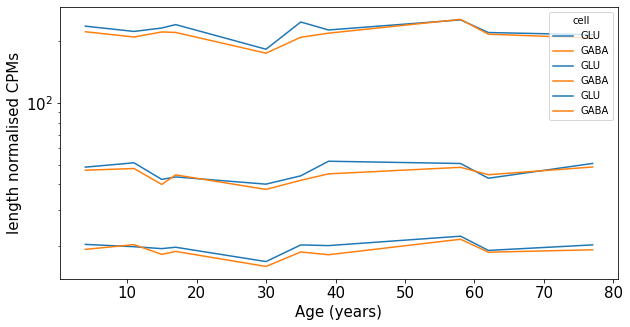

In [210]:
import seaborn as sns
fig,ax = plt.subplots(figsize=(10,5))

sns.lineplot(data=te_c_df, x="age", y="LINE", hue='cell')
sns.lineplot(data=te_c_df, x="age", y="SINE", hue='cell')
sns.lineplot(data=te_c_df, x="age", y="LTR", hue='cell')

plt.xlabel('Age (years)', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.ylabel('length normalised CPMs', fontsize=15)
plt.savefig(s_fig + '/TE_coarse.svg', transparent=True)
plt.show()



<AxesSubplot:xlabel='age', ylabel='SINE'>

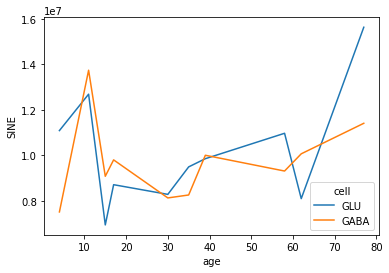

In [ ]:
sns.lineplot(data=te_c_df, x="age", y="SINE", hue="cell")

<AxesSubplot:xlabel='age', ylabel='LTR'>

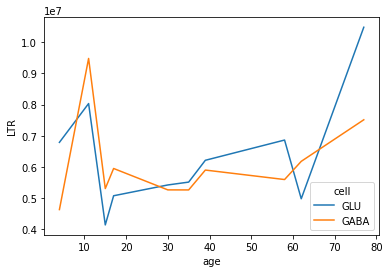

In [ ]:
import seaborn as sns
sns.lineplot(data=te_c_df, x="age", y="LTR", hue="cell")

<AxesSubplot:xlabel='age', ylabel='all genes'>

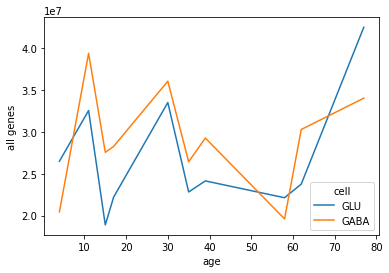

In [ ]:
import seaborn as sns
sns.lineplot(data=te_c_df, x="age", y="all genes", hue="cell")

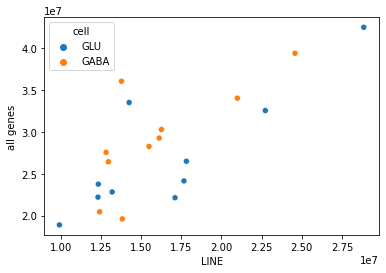

In [ ]:
sns.scatterplot(data=te_c_df, x="LINE", y="all genes", hue="cell")
plt.show()

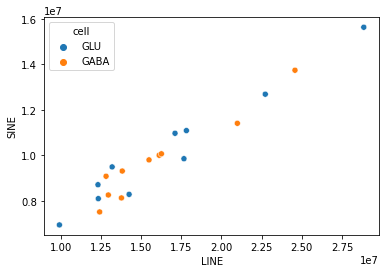

In [ ]:
sns.scatterplot(data=te_c_df, x="LINE", y="SINE", hue="cell")
plt.show()

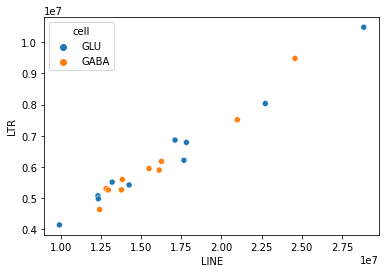

In [ ]:
sns.scatterplot(data=te_c_df, x="LINE", y="LTR", hue="cell")
plt.show()

### Granular cluster



In [213]:
label_df

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,0,1892,83,59,14,chr1,67108753,67109046,-181847376,+,L1P5,LINE,L1,5301,5607,-544,1
1,1,2582,27,0,23,chr1,8388315,8388618,-240567804,-,AluY,SINE,Alu,-15,296,1,1
2,1,4085,171,77,36,chr1,25165803,25166380,-223790042,+,L1MB5,LINE,L1,5567,6174,0,4
3,1,2285,91,0,13,chr1,33554185,33554483,-215401939,-,AluSc,SINE,Alu,-6,303,10,6
4,1,2451,64,3,26,chr1,41942894,41943205,-207013217,-,AluY,SINE,Alu,-7,304,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633659,585,270,146,0,20,chr22_KI270739v1_random,42471,42520,-31465,-,Tigger5b,DNA,TcMar-Tigger,-38,434,387,2
5633660,585,1296,147,2,0,chr22_KI270739v1_random,42530,48656,-25329,-,ALR/Alpha,Satellite,centr,-26,6133,1,2
5633661,585,3289,66,0,0,chr22_KI270739v1_random,48656,49096,-24889,-,L1PA3,LINE,L1,-997,5149,4710,2
5633662,585,6957,54,5,2,chr22_KI270739v1_random,49091,50070,-23915,+,L1PA3,LINE,L1,5171,6152,-3,2


In [218]:
clas = label_df['repClass'].unique()[:3]
LINE_family = label_df['repFamily'][label_df['repClass'] == 'LINE'].unique()
SINE_family = label_df['repFamily'][label_df['repClass'] == 'SINE'].unique()
LTR_family = label_df['repFamily'][label_df['repClass'] == 'LTR'].unique()

In [219]:
LINE_family

array(['L1', 'L2', 'CR1', 'RTE-X', 'RTE-BovB', 'Penelope', 'Dong-R4',
       'I-Jockey', 'L1-Tx1'], dtype=object)

In [220]:
#LINE SUBFAMILIES
curr_input = LINE_family

#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, = [], []
empty_l = [[] for i in range(len(curr_input))]

#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        for x in range(len(empty_l)):
            empty_l[x] = np.append(empty_l[x],TE_sweep(tet_df, curr_input[x]))

te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE))})

for x in range(len(empty_l)):
    te_c_df.insert(len(te_c_df.columns), curr_input[x], empty_l[x])
    
te_c_df

,Sample ID,cell,age,L1,L2,CR1,RTE-X,RTE-BovB,Penelope,Dong-R4,I-Jockey,L1-Tx1
0,6032,GLU,4,157225.862785,96580.602260,9893.941196,2246.279992,0.0,100.605637,89.340681,0.0,0.0
1,6285,GLU,11,166314.231086,101121.189984,9844.984021,2115.896432,0.0,101.327954,87.289579,0.0,0.0
2,1823,GLU,15,133673.243079,86462.770802,9320.964766,2130.242485,0.0,101.191321,79.191170,0.0,0.0
3,5643,GLU,17,138124.764948,88780.091926,9256.487864,2056.147718,0.0,92.783787,74.289131,0.0,0.0
4,Hct16HECA028,GLU,30,127067.449843,82900.665625,7955.286084,1729.939037,0.0,79.729884,64.903248,0.0,0.0
5,1277,GLU,35,141981.171152,87504.534928,9444.531703,2180.304223,0.0,96.061810,73.875364,0.0,0.0
6,1241,GLU,39,171590.321204,100317.264298,10118.241605,2299.659088,0.0,102.964266,86.314932,0.0,0.0
7,1848,GLU,58,164629.375329,99521.676316,10479.752770,2410.707032,0.0,112.077529,89.941567,0.0,0.0
8,5326,GLU,62,141589.650034,82070.661442,8954.384486,2068.317178,0.0,87.757202,74.737752,0.0,0.0
9,5744,GLU,77,164449.604279,101342.566736,9479.846760,2130.089134,0.0,93.516344,73.780971,0.0,0.0


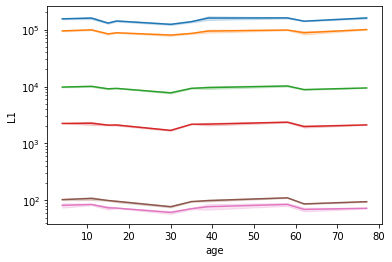

In [221]:
import seaborn as sns
for name in curr_input:
    sns.lineplot(data=te_c_df, x="age", y=name)
plt.yscale('log')
plt.show()


In [ ]:
#SINE SUBFAMILIES
curr_input = SINE_family

#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, = [], []
empty_l = [[] for i in range(len(curr_input))]

#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        for x in range(len(empty_l)):
            empty_l[x] = np.append(empty_l[x],TE_sweep(tet_df, curr_input[x]))

te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE))})

for x in range(len(empty_l)):
    te_c_df.insert(len(te_c_df.columns), curr_input[x], empty_l[x])
    
te_c_df

,Sample ID,cell,age,Alu,MIR,tRNA,tRNA-Deu,5S-Deu-L2,tRNA-RTE
0,6032,GLU,4,6853646.0,4219264.0,0.0,0.0,19843.0,0.0
1,6285,GLU,11,7667374.0,5001593.0,0.0,0.0,23475.0,0.0
2,1823,GLU,15,4371011.0,2561557.0,0.0,0.0,12999.0,0.0
3,5643,GLU,17,5550500.0,3149487.0,0.0,0.0,13925.0,0.0
4,Hct16HECA028,GLU,30,5006052.0,3266891.0,0.0,0.0,15295.0,0.0
5,1277,GLU,35,6136156.0,3344377.0,0.0,0.0,15674.0,0.0
6,1241,GLU,39,5910035.0,3928893.0,0.0,0.0,17898.0,0.0
7,1848,GLU,58,6733828.0,4219895.0,0.0,0.0,20109.0,0.0
8,5326,GLU,62,5134850.0,2952146.0,0.0,0.0,13904.0,0.0
9,5744,GLU,77,9431161.0,6176095.0,0.0,0.0,28263.0,0.0


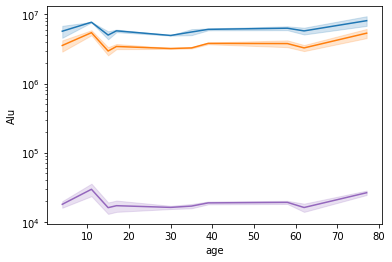

In [ ]:
import seaborn as sns
for name in curr_input:
    sns.lineplot(data=te_c_df, x="age", y=name)
plt.yscale('log')
plt.show()


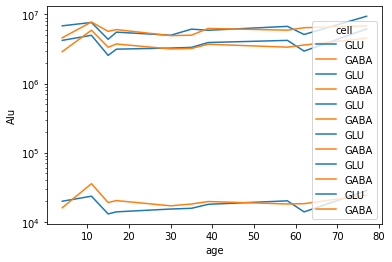

In [ ]:
import seaborn as sns
for name in curr_input:
    sns.lineplot(data=te_c_df, x="age", y=name, hue='cell')
plt.yscale('log')
plt.show()


In [ ]:
#SINE SUBFAMILIES
curr_input = LTR_family

#Store counts and metadata in dataframe
cell_l = ['GLU', 'GABA']
id_l = ID
id_e, cell_e, = [], []
empty_l = [[] for i in range(len(curr_input))]

#Loop through cell and ID
for c in cell_l:
    for i in id_l:
        id_e = np.append(id_e,i)
        cell_e = np.append(cell_e,c)
        tet_df = pd.read_csv(tet_path + '/' + str(i) + '-' + c + '.cntTable', sep='\t')
        tet_df = tet_df.rename(columns={'gene/TE': 'gene', tet_df.T.index[1]: 'counts'})
        for x in range(len(empty_l)):
            empty_l[x] = np.append(empty_l[x],TE_sweep(tet_df, curr_input[x]))

te_c_df = pd.DataFrame({'Sample ID':id_e,'cell':cell_e, 
                        'age':np.hstack((AGE,AGE))})

for x in range(len(empty_l)):
    te_c_df.insert(len(te_c_df.columns), curr_input[x], empty_l[x])
    
te_c_df

,Sample ID,cell,age,ERVL-MaLR,ERV1,ERVK,ERVL,Gypsy,Gypsy?,ERVL?,LTR,ERV1?
0,6032,GLU,4,3129465.0,1804050.0,254430.0,4546743.0,126959.0,126959.0,6595345.0,6788728.0,6595345.0
1,6285,GLU,11,3768196.0,2121676.0,256017.0,5434403.0,155528.0,155528.0,7800769.0,8034361.0,7800769.0
2,1823,GLU,15,1910484.0,1080710.0,153749.0,2789865.0,79125.0,79125.0,4018567.0,4138972.0,4018567.0
3,5643,GLU,17,2347661.0,1334856.0,188800.0,3416185.0,93880.0,93880.0,4932386.0,5075122.0,4932386.0
4,Hct16HECA028,GLU,30,2528507.0,1433974.0,203035.0,3638276.0,102595.0,102595.0,5268108.0,5421477.0,5268108.0
5,1277,GLU,35,2539022.0,1463712.0,204126.0,3696740.0,102062.0,102062.0,5357176.0,5513329.0,5357176.0
6,1241,GLU,39,2860166.0,1689228.0,212917.0,4137152.0,119790.0,119790.0,6031021.0,6213618.0,6031021.0
7,1848,GLU,58,3199833.0,1805221.0,235742.0,4632823.0,130789.0,130789.0,6664079.0,6862977.0,6664079.0
8,5326,GLU,62,2284189.0,1310327.0,210142.0,3324579.0,91314.0,91314.0,4837874.0,4978395.0,4837874.0
9,5744,GLU,77,4807077.0,2855265.0,360610.0,6987913.0,197109.0,197109.0,10188071.0,10483882.0,10188071.0


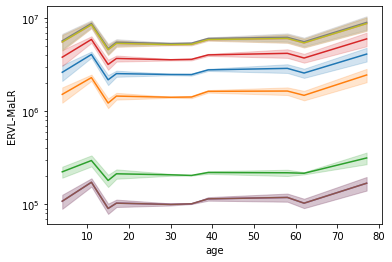

In [ ]:
import seaborn as sns
for name in curr_input:
    sns.lineplot(data=te_c_df, x="age", y=name)
plt.yscale('log')
plt.show()